## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [48]:
# Installing the libraries with the specified version.
#!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 imbalanced-learn==0.10.1 xgboost==2.0.3 threadpoolctl==3.3.0 -q --user
#!pip install pandas==2.2.2 numpy==1.25.2 matplotlib==3.8.0 seaborn==0.13.1 scikit-learn==1.2.2 imbalanced-learn==0.10.1 xgboost==2.0.3 threadpoolctl==3.3.0 statsmodels==0.14.1 -q --user
!pip install pandas==2.2.2 numpy==1.25.2 matplotlib==3.8.0 seaborn==0.13.1 scikit-learn==1.3.1 imbalanced-learn==0.10.1 xgboost==2.0.3 threadpoolctl==3.3.0 statsmodels==0.14.1 -q --user


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 26.7 MB/s eta 0:00:00


**Used a higher version of the scikit-learn library as the intial version (1.2.2) **reported the error below**

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.

**Note:** After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.

In [8]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer , KNNImputer

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
    StackingClassifier,
)
from xgboost import XGBClassifier

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score , KFold
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# To use statistical functions
import scipy.stats as stats

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black


## Loading the dataset

In [17]:
# Reading Training datasets provided by ReneWind by using read_csv from pandas package
ReneWind_train_main_df = pd.read_csv("/content/sample_data/Train.csv.csv")

# copying data to another variable to avoid any changes to original data
ReneWind_train_df_cp = ReneWind_train_main_df.copy()

# Reading Test datasets provided by ReneWind by using read_csv from pandas package
ReneWind_test_main_df = pd.read_csv("/content/sample_data/Test.csv.csv")

# copying data to another variable to avoid any changes to original data
ReneWind_test_df_cp = ReneWind_test_main_df.copy()


## Data Overview

The initial steps conducted to get an overview of any dataset is to:
- View the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Check the shape of the dataset to get information about the number of rows and columns in the dataset
- Obtain information about the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- Check the statistical summary of the dataset to get an overview of the numerical columns of the data


### Viewing the first and last few rows of the dataset

`Training Set`

In [ ]:
# Extracting first few rows of the dataset
ReneWind_train_df_cp.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0


In [ ]:
# Extracting last few rows of the dataset
ReneWind_train_df_cp.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
19995,-2.071,-1.088,-0.796,-3.012,-2.288,2.807,0.481,0.105,-0.587,-2.899,8.868,1.717,1.358,-1.777,0.710,4.945,-3.100,-1.199,-1.085,-0.365,3.131,-3.948,-3.578,-8.139,-1.937,-1.328,-0.403,-1.735,9.996,6.955,-3.938,-8.274,5.745,0.589,-0.650,-3.043,2.216,0.609,0.178,2.928,1
19996,2.890,2.483,5.644,0.937,-1.381,0.412,-1.593,-5.762,2.150,0.272,-2.095,-1.526,0.072,-3.540,-2.762,-10.632,-0.495,1.720,3.872,-1.210,-8.222,2.121,-5.492,1.452,1.450,3.685,1.077,-0.384,-0.839,-0.748,-1.089,-4.159,1.181,-0.742,5.369,-0.693,-1.669,3.660,0.820,-1.987,0
19997,-3.897,-3.942,-0.351,-2.417,1.108,-1.528,-3.520,2.055,-0.234,-0.358,-3.782,2.180,6.112,1.985,-8.330,-1.639,-0.915,5.672,-3.924,2.133,-4.502,2.777,5.728,1.620,-1.700,-0.042,-2.923,-2.760,-2.254,2.552,0.982,7.112,1.476,-3.954,1.856,5.029,2.083,-6.409,1.477,-0.874,0
19998,-3.187,-10.052,5.696,-4.370,-5.355,-1.873,-3.947,0.679,-2.389,5.457,1.583,3.571,9.227,2.554,-7.039,-0.994,-9.665,1.155,3.877,3.524,-7.015,-0.132,-3.446,-4.801,-0.876,-3.812,5.422,-3.732,0.609,5.256,1.915,0.403,3.164,3.752,8.530,8.451,0.204,-7.130,4.249,-6.112,0
19999,-2.687,1.961,6.137,2.600,2.657,-4.291,-2.344,0.974,-1.027,0.497,-9.589,3.177,1.055,-1.416,-4.669,-5.405,3.720,2.893,2.329,1.458,-6.429,1.818,0.806,7.786,0.331,5.257,-4.867,-0.819,-5.667,-2.861,4.674,6.621,-1.989,-1.349,3.952,5.450,-0.455,-2.202,1.678,-1.974,0


`Testing Set`

In [ ]:
# Extracting first few rows of the dataset
ReneWind_test_df_cp.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613,-3.820,2.202,1.300,-1.185,-4.496,-1.836,4.723,1.206,-0.342,-5.123,1.017,4.819,3.269,-2.984,1.387,2.032,-0.512,-1.023,7.339,-2.242,0.155,2.054,-2.772,1.851,-1.789,-0.277,-1.255,-3.833,-1.505,1.587,2.291,-5.411,0.870,0.574,4.157,1.428,-10.511,0.455,-1.448,0
1,0.390,-0.512,0.527,-2.577,-1.017,2.235,-0.441,-4.406,-0.333,1.967,1.797,0.410,0.638,-1.390,-1.883,-5.018,-3.827,2.418,1.762,-3.242,-3.193,1.857,-1.708,0.633,-0.588,0.084,3.014,-0.182,0.224,0.865,-1.782,-2.475,2.494,0.315,2.059,0.684,-0.485,5.128,1.721,-1.488,0
2,-0.875,-0.641,4.084,-1.590,0.526,-1.958,-0.695,1.347,-1.732,0.466,-4.928,3.565,-0.449,-0.656,-0.167,-1.630,2.292,2.396,0.601,1.794,-2.120,0.482,-0.841,1.790,1.874,0.364,-0.169,-0.484,-2.119,-2.157,2.907,-1.319,-2.997,0.460,0.620,5.632,1.324,-1.752,1.808,1.676,0
3,0.238,1.459,4.015,2.534,1.197,-3.117,-0.924,0.269,1.322,0.702,-5.578,-0.851,2.591,0.767,-2.391,-2.342,0.572,-0.934,0.509,1.211,-3.260,0.105,-0.659,1.498,1.100,4.143,-0.248,-1.137,-5.356,-4.546,3.809,3.518,-3.074,-0.284,0.955,3.029,-1.367,-3.412,0.906,-2.451,0
4,5.828,2.768,-1.235,2.809,-1.642,-1.407,0.569,0.965,1.918,-2.775,-0.530,1.375,-0.651,-1.679,-0.379,-4.443,3.894,-0.608,2.945,0.367,-5.789,4.598,4.450,3.225,0.397,0.248,-2.362,1.079,-0.473,2.243,-3.591,1.774,-1.502,-2.227,4.777,-6.560,-0.806,-0.276,-3.858,-0.538,0


In [ ]:
# Extracting last few rows of the dataset
ReneWind_test_df_cp.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
4995,-5.120,1.635,1.251,4.036,3.291,-2.932,-1.329,1.754,-2.985,1.249,-6.878,3.715,-2.512,-1.395,-2.554,-2.197,4.772,2.403,3.792,0.487,-2.028,1.778,3.668,11.375,-1.977,2.252,-7.319,1.907,-3.734,-0.012,2.120,9.979,0.063,0.217,3.036,2.109,-0.557,1.939,0.513,-2.694,0
4996,-5.172,1.172,1.579,1.220,2.530,-0.669,-2.618,-2.001,0.634,-0.579,-3.671,0.460,3.321,-1.075,-7.113,-4.356,-0.001,3.698,-0.846,-0.222,-3.645,0.736,0.926,3.278,-2.277,4.458,-4.543,-1.348,-1.779,0.352,-0.214,4.424,2.604,-2.152,0.917,2.157,0.467,0.470,2.197,-2.377,0
4997,-1.114,-0.404,-1.765,-5.879,3.572,3.711,-2.483,-0.308,-0.922,-2.999,-0.112,-1.977,-1.623,-0.945,-2.735,-0.813,0.610,8.149,-9.199,-3.872,-0.296,1.468,2.884,2.792,-1.136,1.198,-4.342,-2.869,4.124,4.197,3.471,3.792,7.482,-10.061,-0.387,1.849,1.818,-1.246,-1.261,7.475,0
4998,-1.703,0.615,6.221,-0.104,0.956,-3.279,-1.634,-0.104,1.388,-1.066,-7.970,2.262,3.134,-0.486,-3.498,-4.562,3.136,2.536,-0.792,4.398,-4.073,-0.038,-2.371,-1.542,2.908,3.215,-0.169,-1.541,-4.724,-5.525,1.668,-4.100,-5.949,0.550,-1.574,6.824,2.139,-4.036,3.436,0.579,0
4999,-0.604,0.960,-0.721,8.230,-1.816,-2.276,-2.575,-1.041,4.130,-2.731,-3.292,-1.674,0.465,-1.646,-5.263,-7.988,6.480,0.226,4.963,6.752,-6.306,3.271,1.897,3.271,-0.637,-0.925,-6.759,2.990,-0.814,3.499,-8.435,2.370,-1.062,0.791,4.952,-7.441,-0.070,-0.918,-2.291,-5.363,0


**Observations**

* The dataset contains sensor data collected from various parts of wind turbines, including environmental factors (e.g., temperature, humidity, wind speed) and turbine components (e.g., gearbox, tower, blades, brake). This information is crucial for identifying trends and factors influencing generator failures, enabling predictive maintenance to reduce operational costs.

* A preliminary look at the head and tail of the dataset suggests there are no missing values. However, to confirm the dataset is complete across all rows and columns, a full check for missing values will be performed  to ensure data quality.

### Understanding the shape of the dataset.

`Training set`

In [ ]:
# Checking the number of rows and columns in the training set
ReneWind_train_df_cp.shape

(20000, 41)

`Testing Set`

In [ ]:
# Checking the number of rows and columns in the testing set
ReneWind_test_df_cp.shape

(5000, 41)

**Observations**

* The dataset has 20,000 rows and 41 columns in training set
* The dataset has 5,000 rows and 41 columns in testing set

### Check the data types of the columns for the dataset.

`Training Set`

In [11]:
# Checking the data types of the columns in the dataset
ReneWind_train_df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

`Testing Set`

In [12]:
# Checking the data types of the columns in the dataset
ReneWind_test_df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

**Observations**


Training Set
1. The dataset comprises a total of 41 columns, including 40 float-type variables and 1 integer-type variable (the target column).
2. Columns V1 and V2 have fewer than the total number of entries (20,000 in the training set), indicating the presence of missing values.
3. The target variable, labeled as Target, represents a binary classification with two classes:
  * 1 for “failure”
  * 0 for “No failure”


Testing Set
* Testing test has similar attributes as training set, with Columns V1 and V2 having fewer than the total number of entries in the testing set (5,000)

### Checking for Missing Values and Duplicates

`Missing Values`

In [52]:
# Checking for missing values in the training data
vtrain_null = ReneWind_train_df_cp.isnull().sum()
vtrain_null[vtrain_null >0]

,0
V1,18
V2,18


In [53]:
# Checking for missing values in the testing data
vtest_null = ReneWind_test_df_cp.isnull().sum()
vtest_null[vtest_null >0]

,0
V1,5
V2,6


`Duplicates`

In [17]:
# Checking for duplicate values in the training data
ReneWind_train_df_cp.duplicated().sum()

0

In [18]:
# Checking for duplicate values in the testing data
ReneWind_test_df_cp.duplicated().sum()

0

**Observations**

<br>
Training Set

* Columns V1 and v2 have 18 missing values, which would be treated as part of data preprocessing
* No duplicate values

<br>
Testing Set

* Columns V1 and v2 have 5 and 6 missing values respectively.
* No duplicate values

### Checking Statistical Summary of the dataset

In [ ]:
ReneWind_train_df_cp.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.000,-0.272,3.442,-11.876,-2.737,-0.748,1.840,15.493
V2,19982.000,0.440,3.151,-12.320,-1.641,0.472,2.544,13.089
V3,20000.000,2.485,3.389,-10.708,0.207,2.256,4.566,17.091
V4,20000.000,-0.083,3.432,-15.082,-2.348,-0.135,2.131,13.236
V5,20000.000,-0.054,2.105,-8.603,-1.536,-0.102,1.340,8.134
V6,20000.000,-0.995,2.041,-10.227,-2.347,-1.001,0.380,6.976
V7,20000.000,-0.879,1.762,-7.950,-2.031,-0.917,0.224,8.006
V8,20000.000,-0.548,3.296,-15.658,-2.643,-0.389,1.723,11.679
V9,20000.000,-0.017,2.161,-8.596,-1.495,-0.068,1.409,8.138
V10,20000.000,-0.013,2.193,-9.854,-1.411,0.101,1.477,8.108


**Observations**

V1: Slightly left-skewed with mean (-0.272) smaller than the median (-0.748). Range spans from -11.876 to 15.493.

V2: Mean (0.440) and median (0.472) are close, suggesting approximate symmetry, but minimum value (-12.320) indicates potential outliers.

V3: Balanced distribution with mean (2.485) and median (2.256). Spread is wide, from -10.708 to 17.091.

V4: Symmetric distribution with mean (-0.083) and median (-0.135). Spread: -15.082 to 13.236.

V5: Balanced spread with mean (-0.054) and median (-0.102). Narrower range: -8.603 to 8.134.

V6: Slightly left-skewed with mean (-0.995) smaller than median (-1.001). Spread: -10.227 to 6.976.

V7: Symmetric distribution with mean (-0.879) and median (-0.917). Positive and negative values are evenly distributed (-7.950 to 8.006).

V8: Balanced distribution with mean (-0.548) and median (-0.389). Potential outliers indicated by range: -15.658 to 11.679.

V9: Symmetric distribution with mean (-0.017) and median (-0.068). Spread: -8.596 to 8.138.

V10: Almost symmetric with mean (-0.013) and median (0.101). Spread: -9.854 to 8.108.

V11: Slight left skew with mean (-1.895) smaller than median (-1.921). Spread: -14.832 to 11.826.

V12: Positively skewed with mean (1.605) greater than median (1.508). Spread: -12.948 to 15.081.

V13: Symmetric spread with mean (1.580) and median (1.637). Positive dominance. Spread: -13.228 to 15.420.

V14: Slight left skew with mean (-0.951) smaller than median (-0.957). Spread: -7.739 to 5.671.

V15: Noticeably left-skewed with mean (-2.415) smaller than median (-2.383). Spread: -16.417 to 12.246.

V16: Significant left skew with mean (-2.925) smaller than median (-2.683). Spread: -20.374 to 13.583.

V17: Balanced spread with mean (-0.134) close to median (-0.015). Symmetry suggested by spread: -14.091 to 16.756.

V18: Positively skewed with mean (1.189) and median (0.883). Spread: -11.644 to 13.180.

V19: Slight positive skew with mean (1.182) and median (1.279). Spread: -13.492 to 13.238.

V20: Symmetric spread with mean (0.024) and median (0.033). Spread: -13.923 to 16.052.

V21: Left-skewed with mean (-3.611) smaller than median (-3.533). Spread: -17.956 to 13.840.

V22: Symmetric with mean (0.952) and median (0.975). Narrow spread: -10.122 to 7.410.

V23: Slight left skew with mean (-0.366) smaller than median (-0.262). Spread: -14.866 to 14.459.

V24: Balanced distribution with mean (1.134) and median (0.969). Positive dominance with spread: -16.387 to 17.163.

V25: Symmetric with mean (-0.002) and median (0.025). Spread: -8.228 to 8.223.

V26: Positively skewed with mean (1.874) greater than median (1.951). Spread: -11.834 to 16.836.

V27: Left-skewed with mean (-0.612) smaller than median (-0.885). Spread: -14.905 to 17.560.

V28: Symmetric with mean (-0.883) and median (-0.891). Spread: -9.269 to 6.528.

V29: Slight left skew with mean (-0.986) smaller than median (-1.176). Spread: -12.579 to 10.722.

V30: Symmetric with mean (-0.016) and median (0.184). Spread: -14.796 to 12.506.

V31: Slight positive skew with mean (0.487) and median (0.490). Spread: -13.723 to 17.255.

V32: Wide range with mean (0.304) close to median (0.052). Positively skewed spread: -19.877 to 23.633.

V33: Balanced spread with mean (0.050) and median (-0.066). Spread: -16.898 to 16.692.

V34: Left-skewed with mean (-0.463) smaller than median (-0.255). Spread: -17.985 to 14.358.

V35: Symmetric with mean (2.230) and median (2.099). Positive dominance. Spread: -15.350 to 15.291.

V36: Slight positive skew with mean (1.515) and median (1.567). Spread: -14.833 to 19.330.

V37: Symmetric spread with mean (0.011) and median (-0.128). Narrow spread: -5.478 to 7.467.

V38: Slight left skew with mean (-0.344) and median (-0.317). Spread: -17.375 to 15.290.

V39: Symmetric with mean (0.891) close to median (0.919). Spread: -6.439 to 7.760.

V40: Balanced distribution with mean (-0.876) close to median (-0.921). Spread: -11.024 to 10.654.

Target: Mean (0.056) reflects a significant class imbalance with majority being "0" (no failure).

## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Plotting histograms and boxplots for all the features at one go

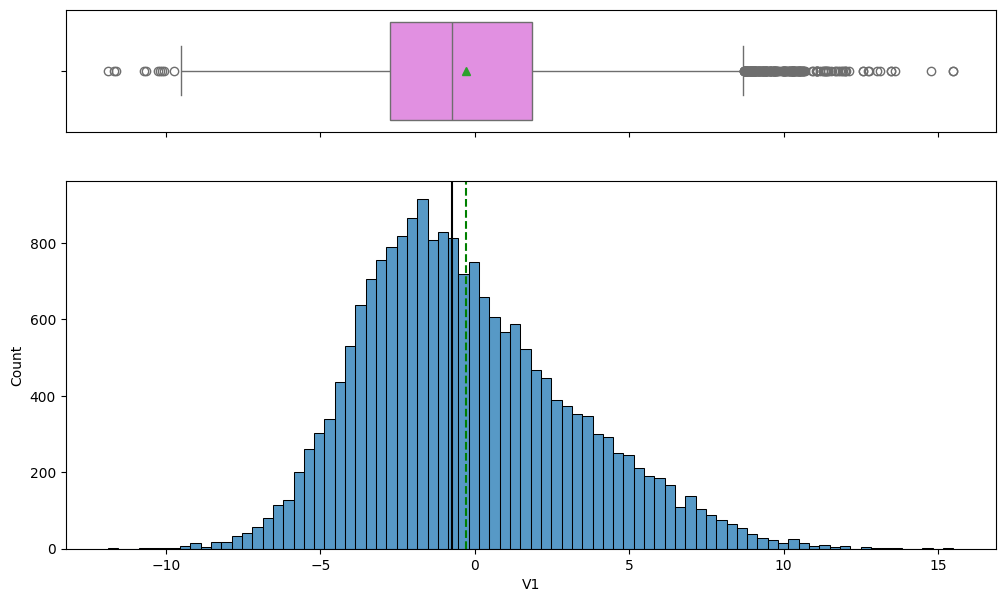

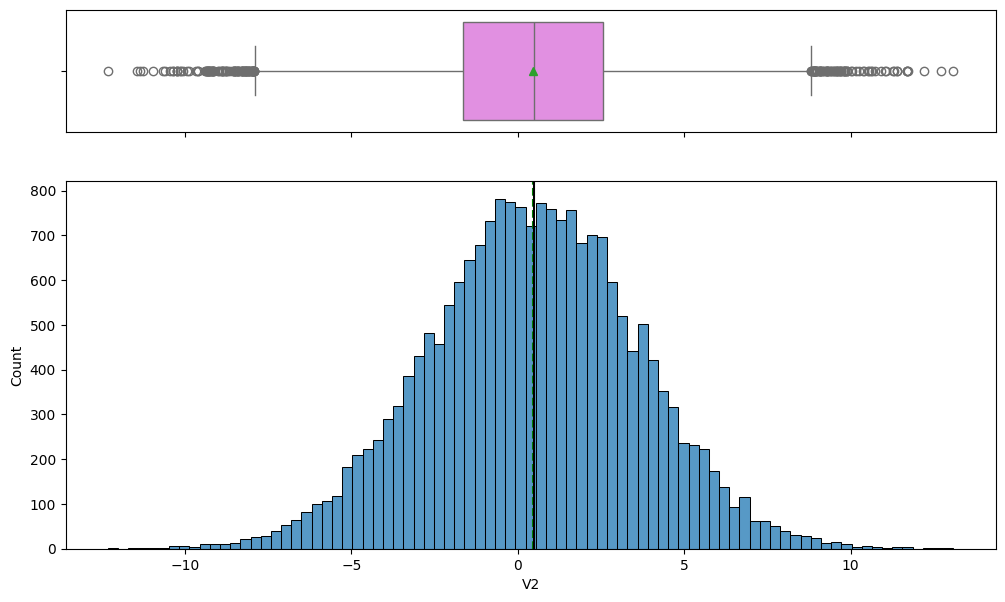

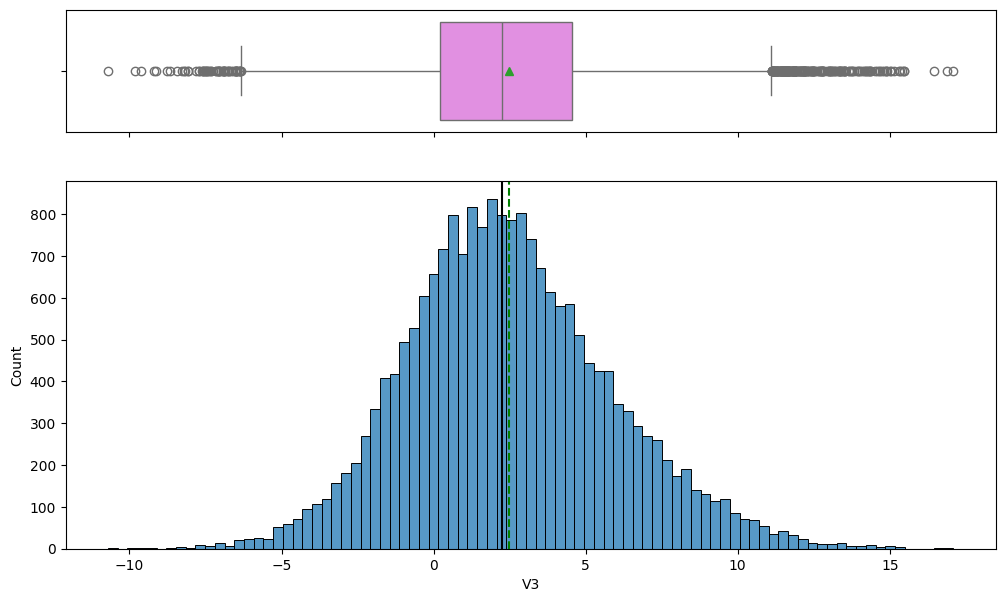

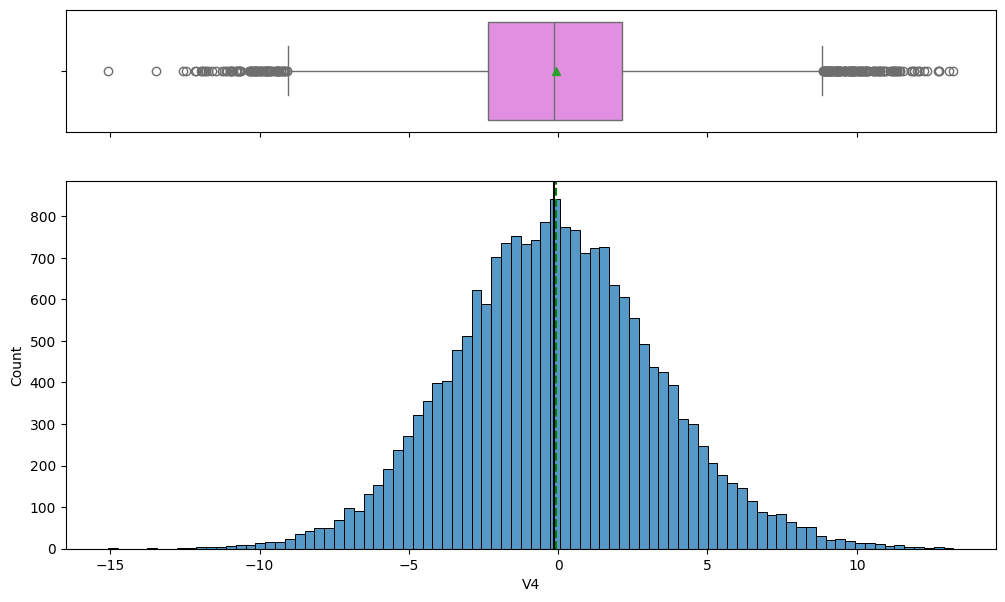

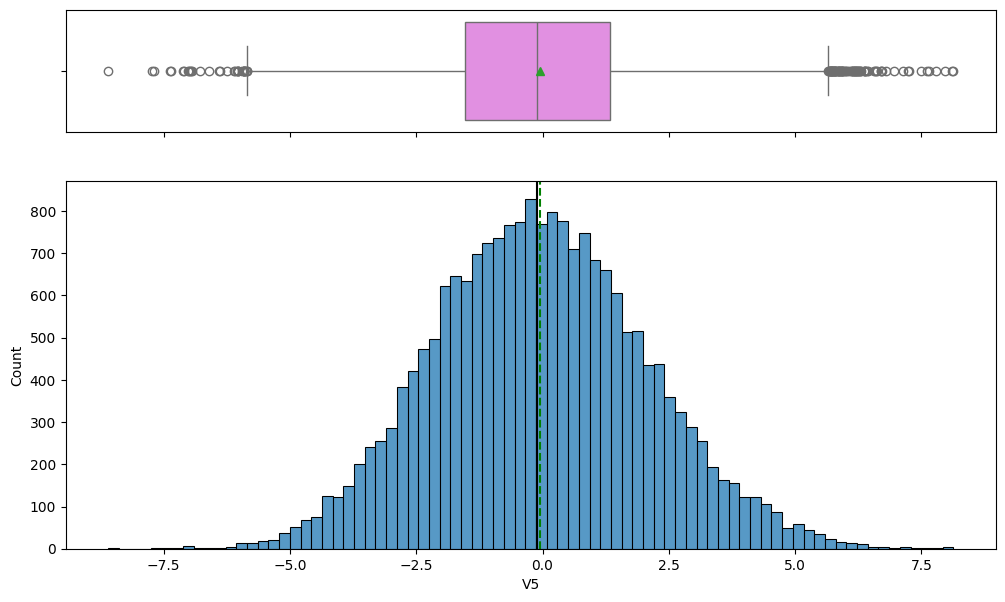

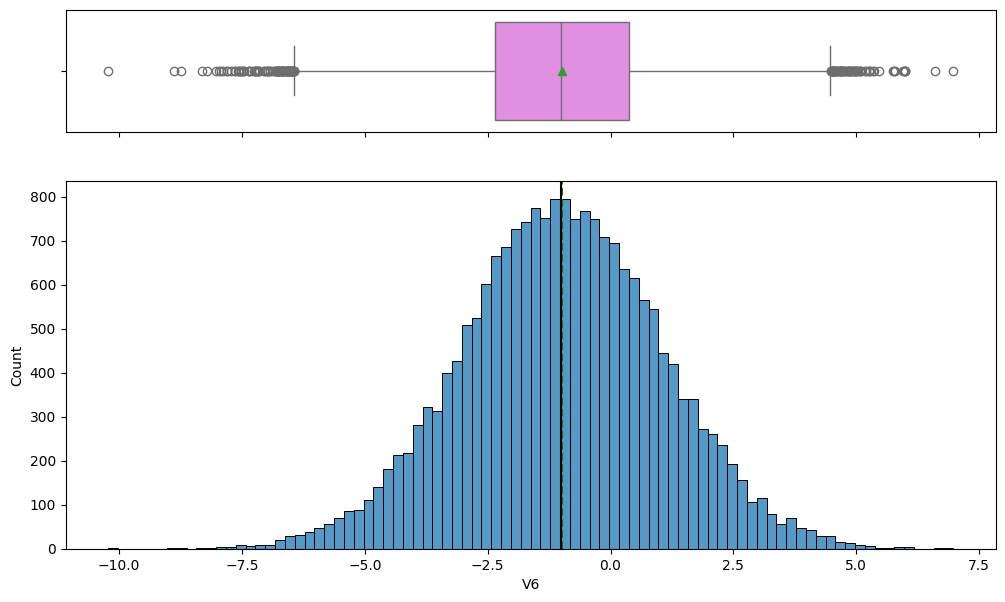

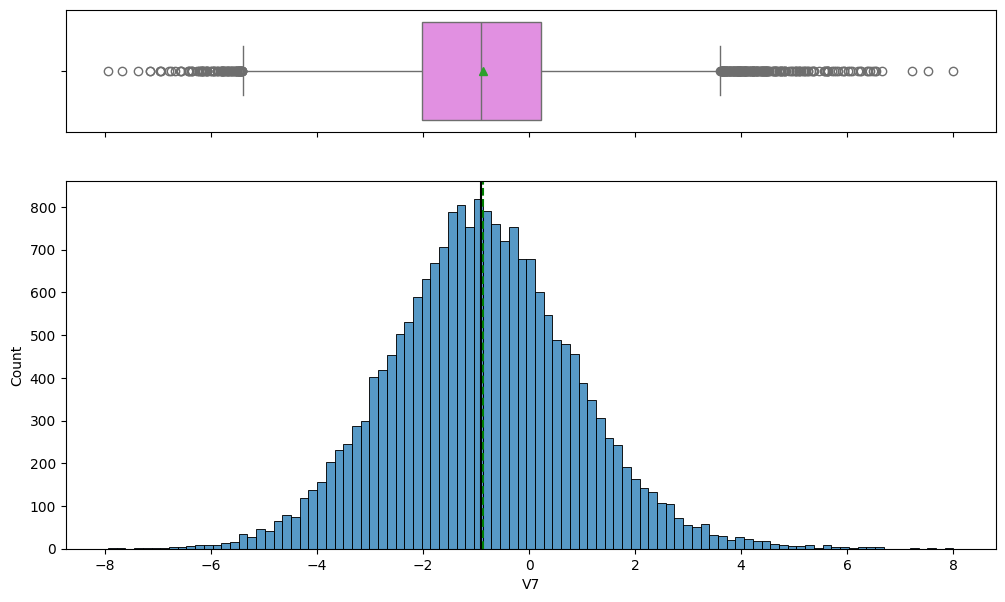

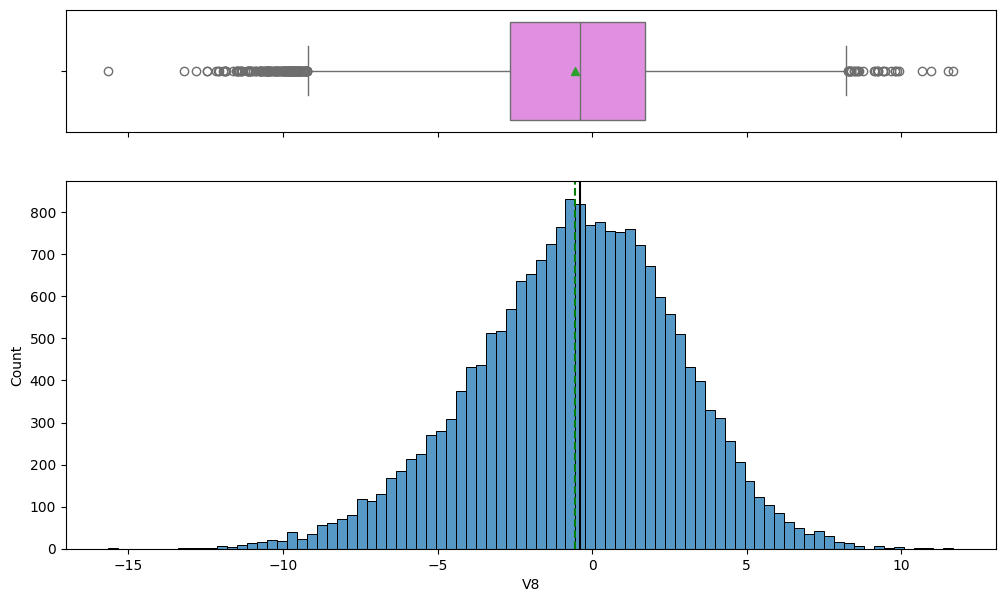

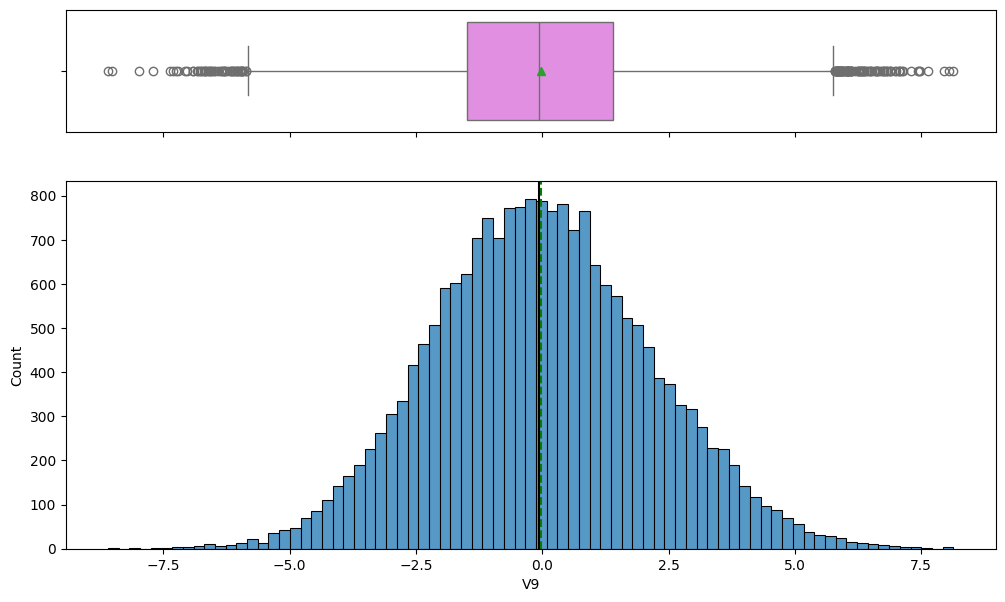

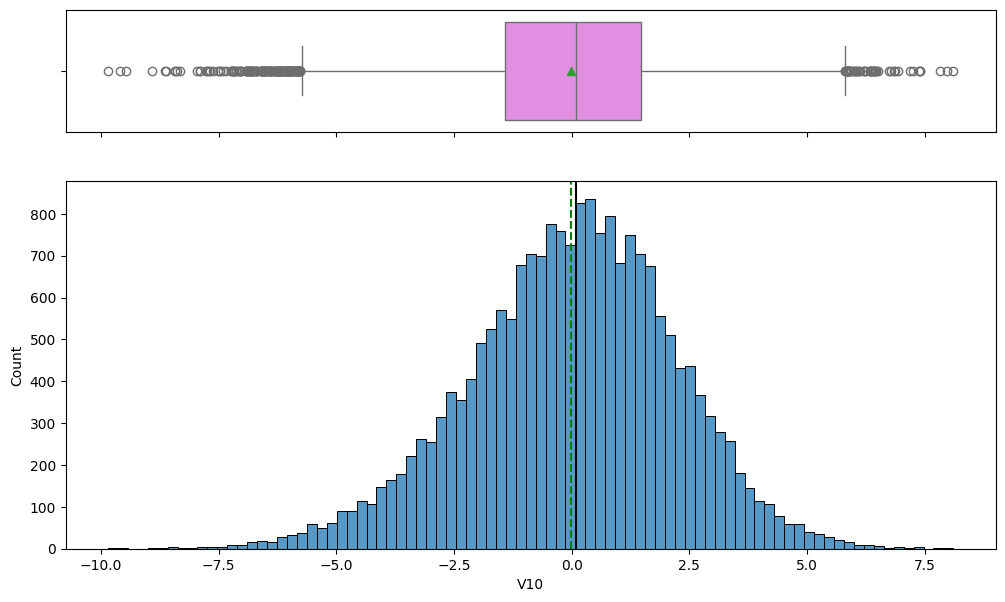

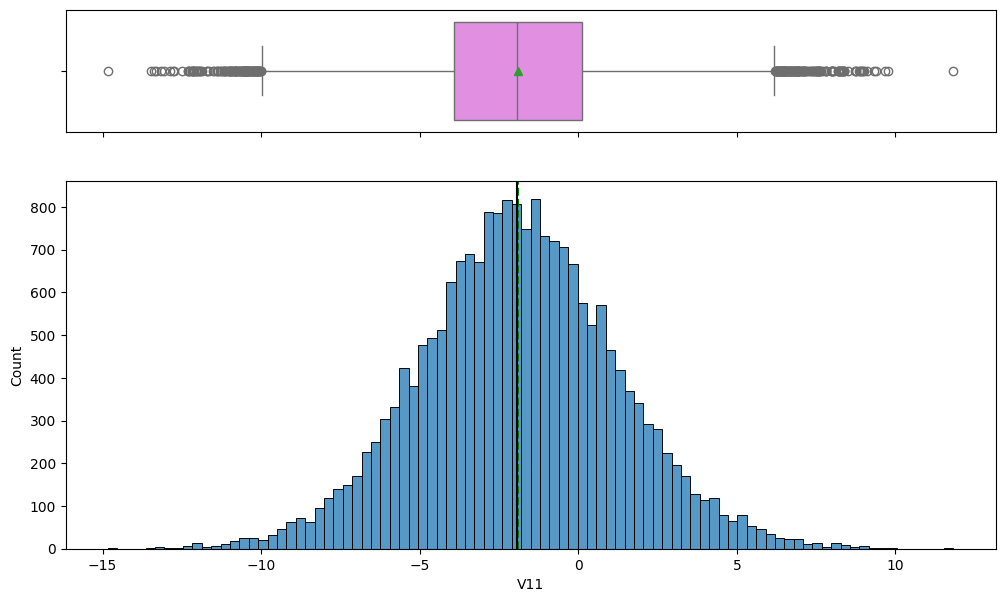

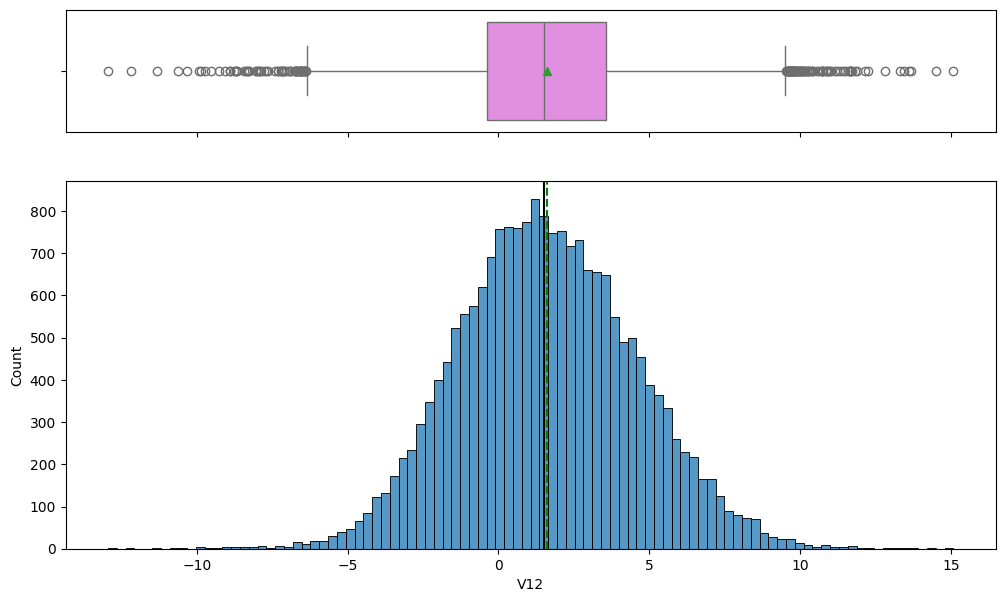

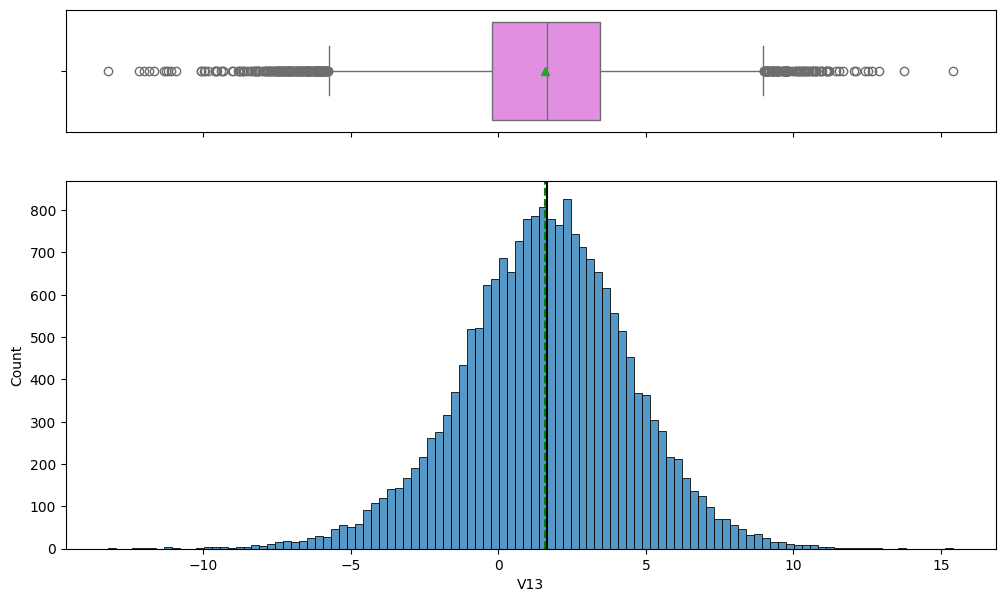

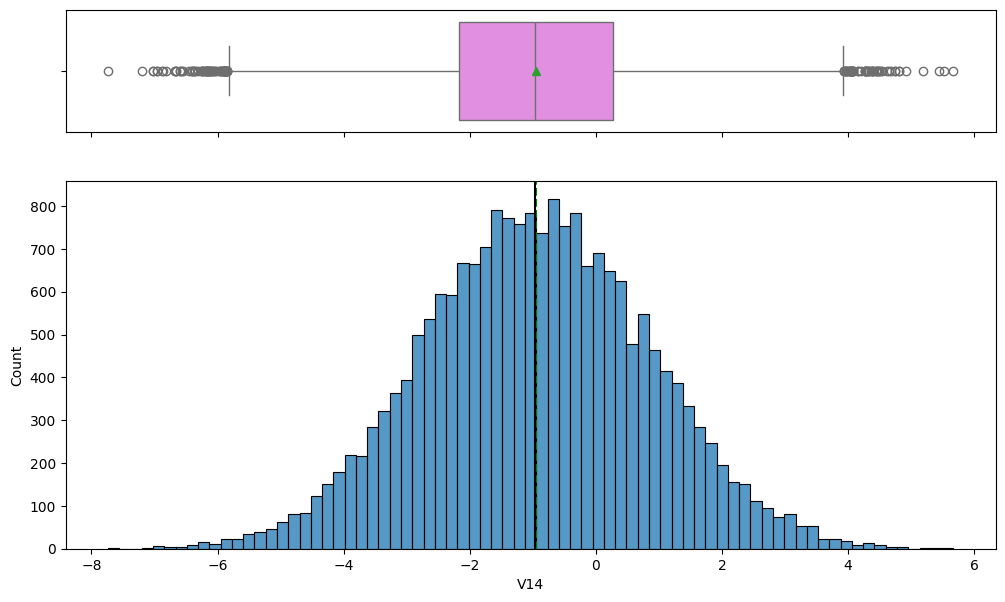

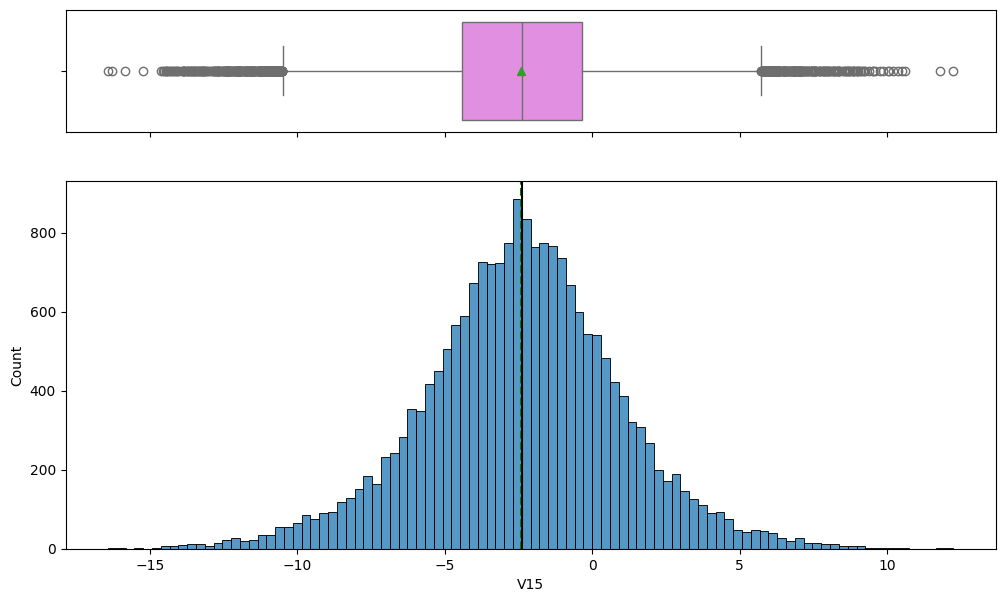

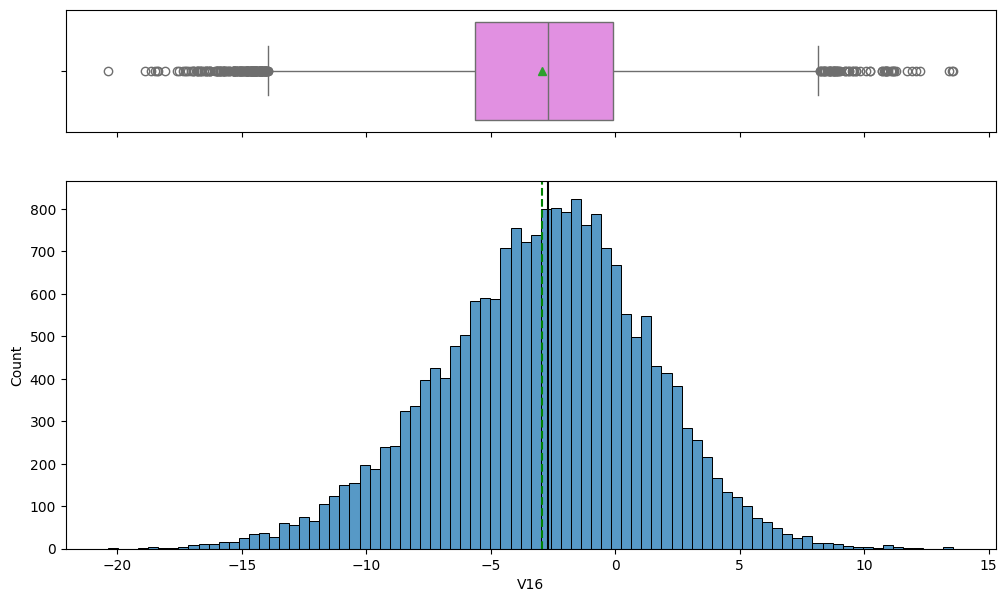

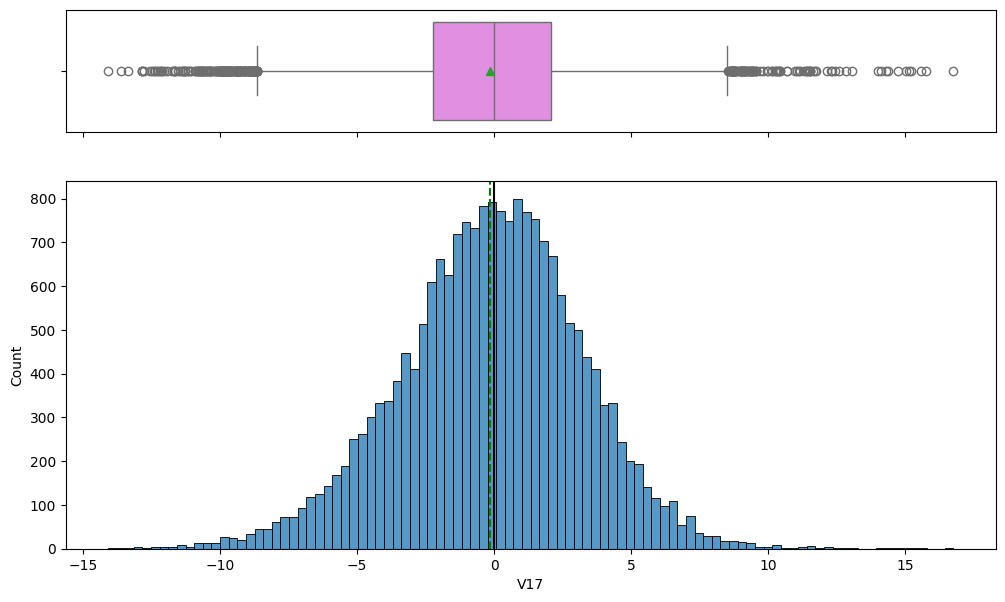

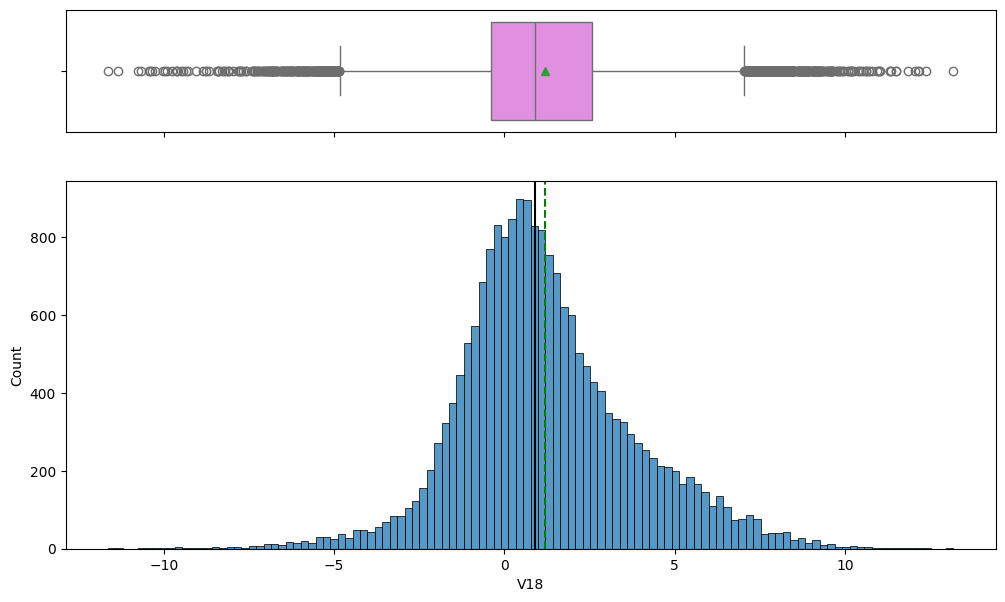

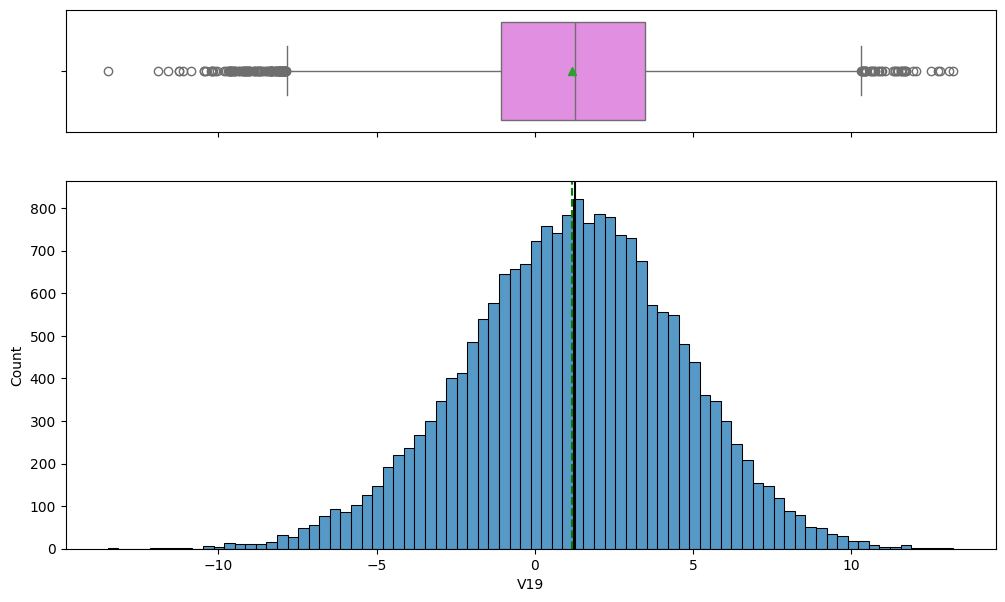

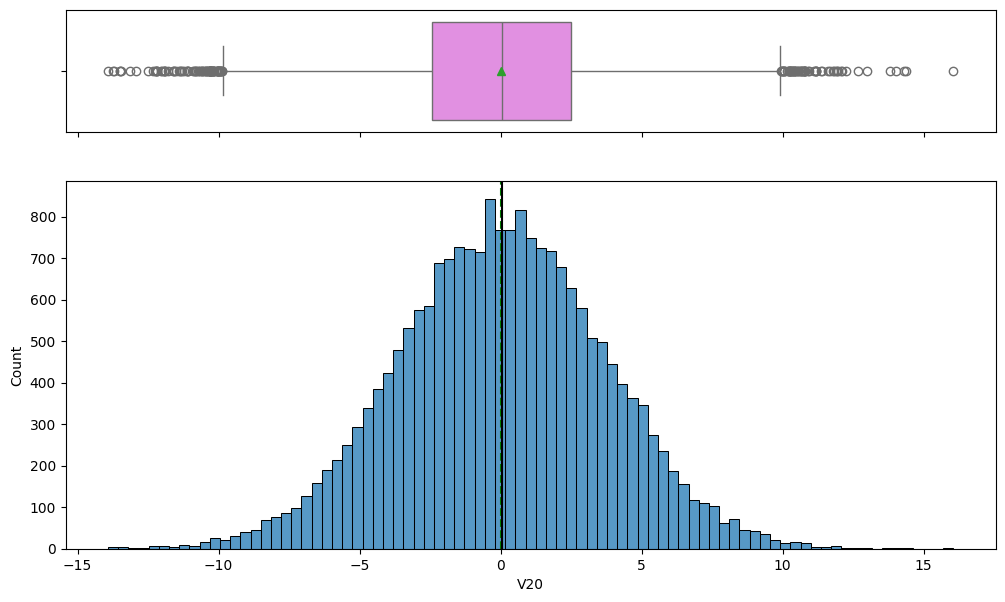

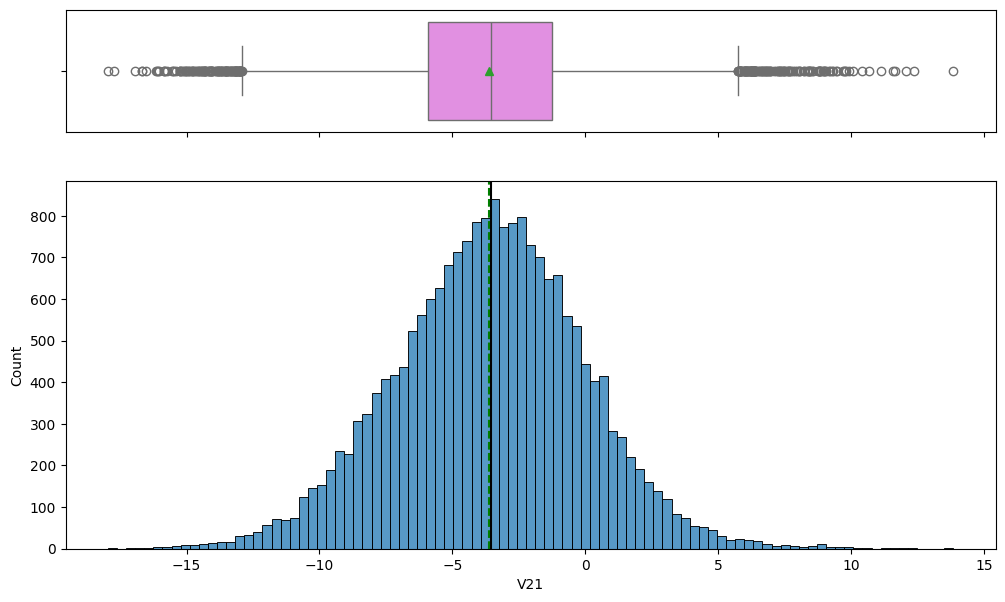

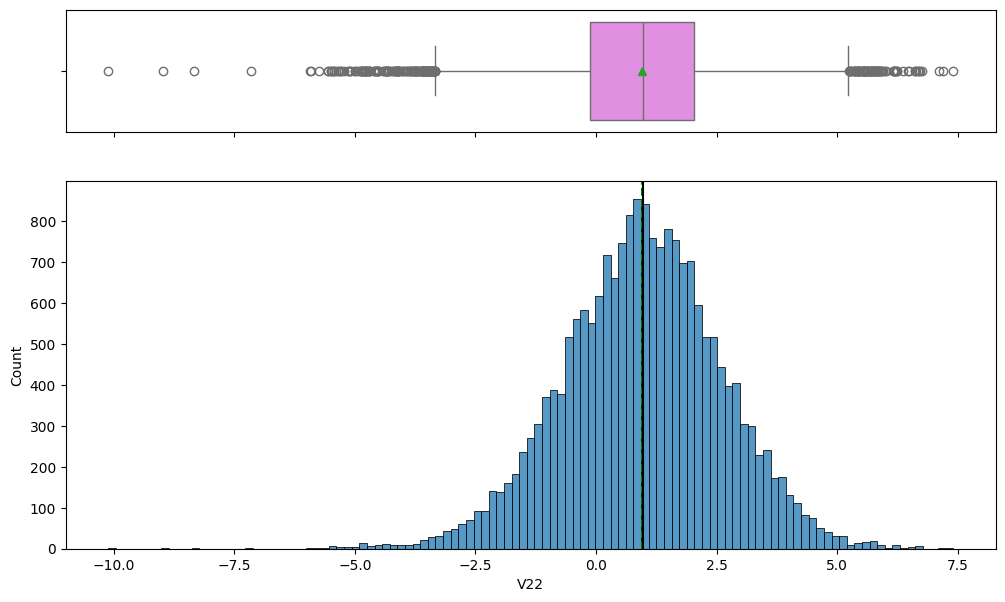

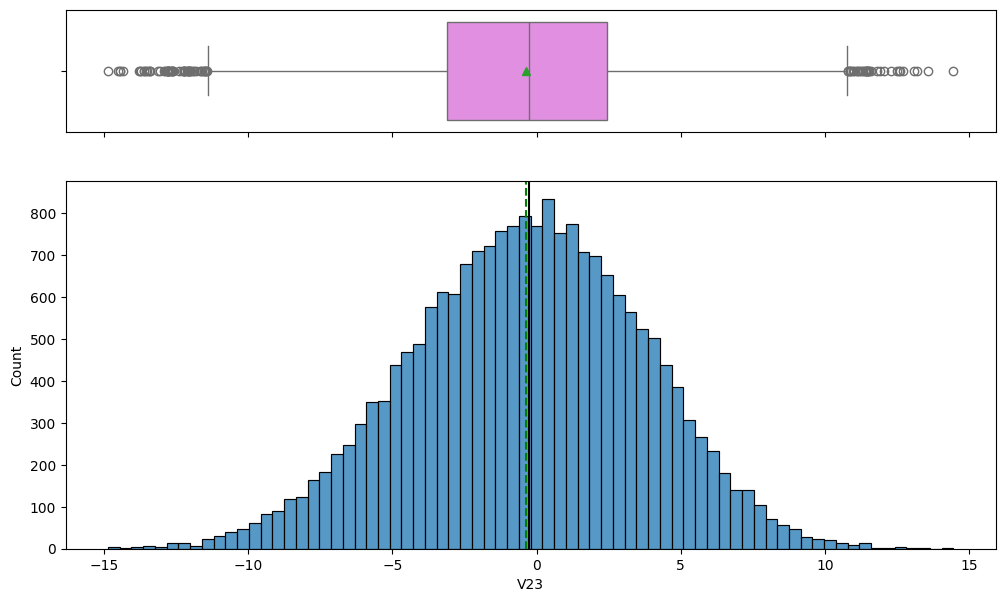

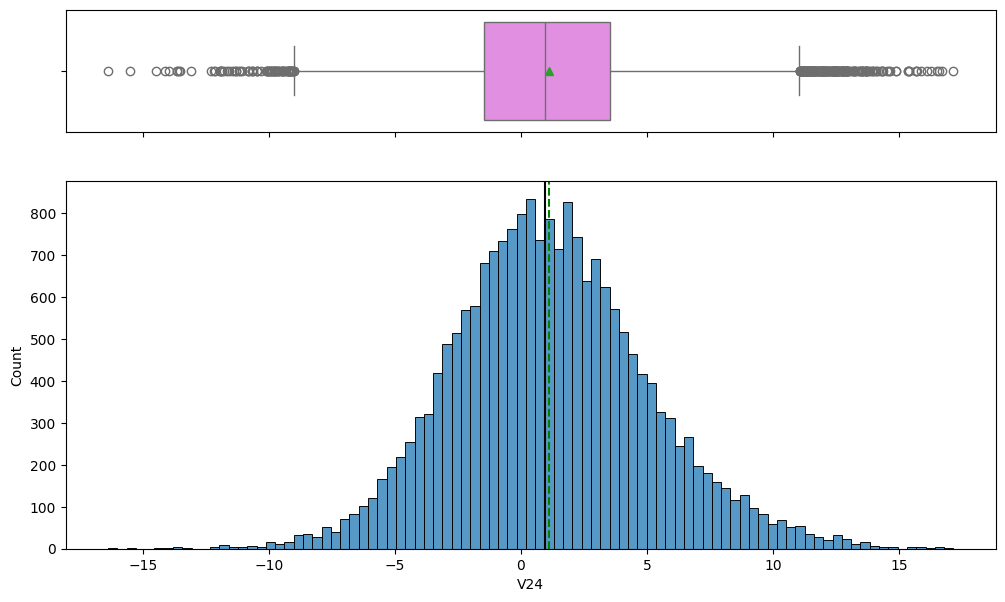

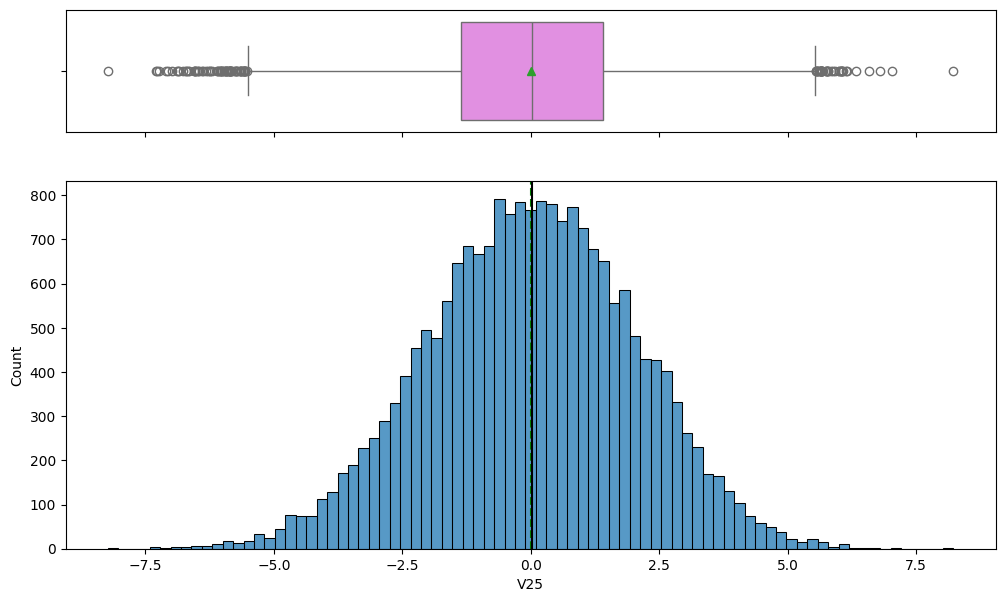

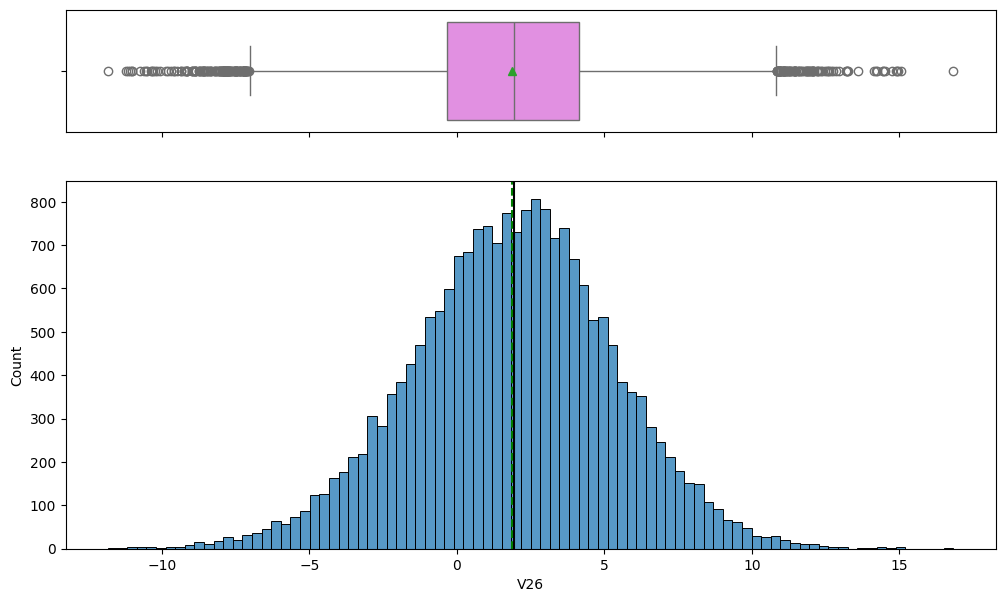

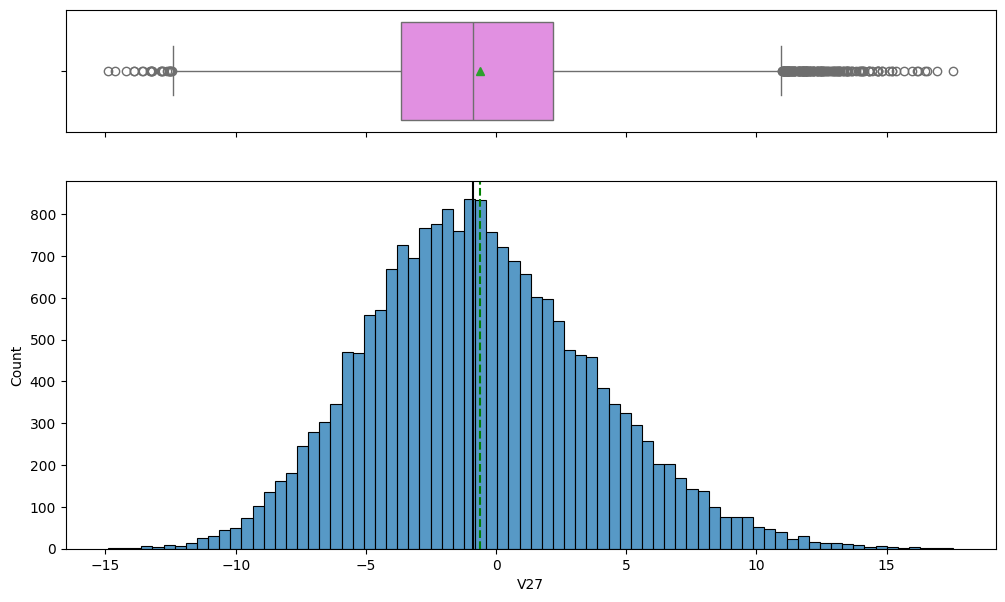

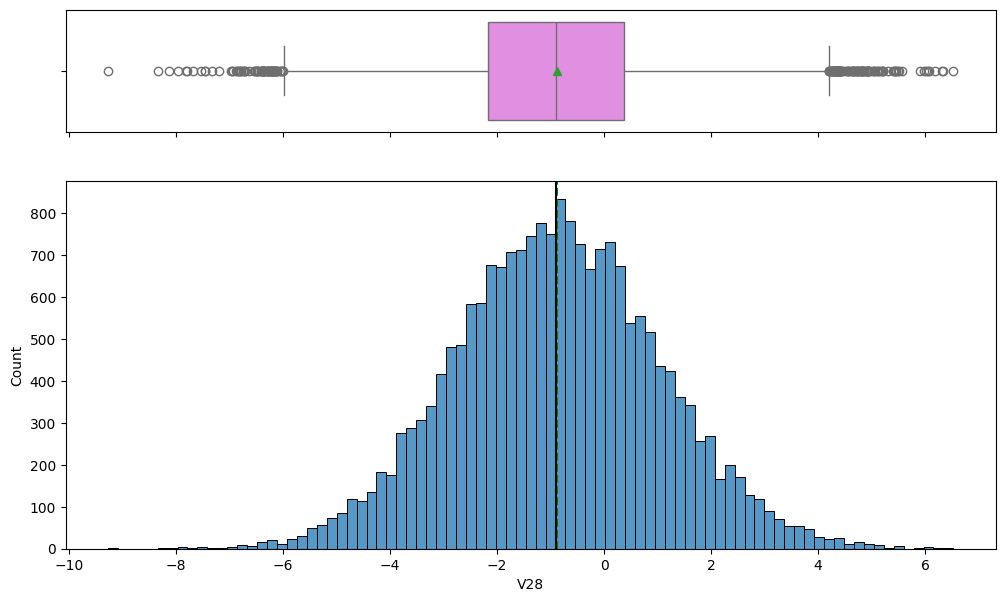

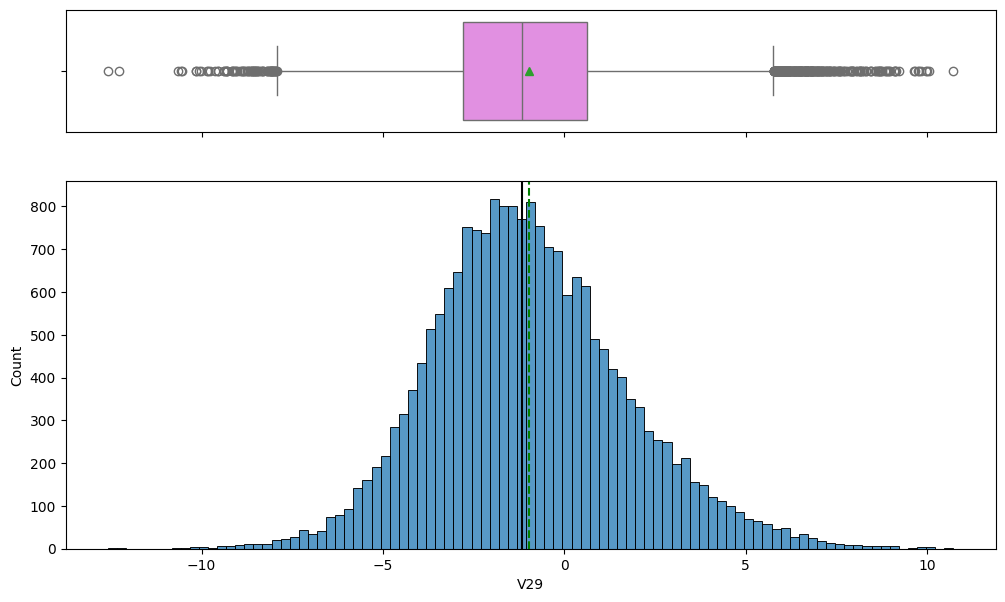

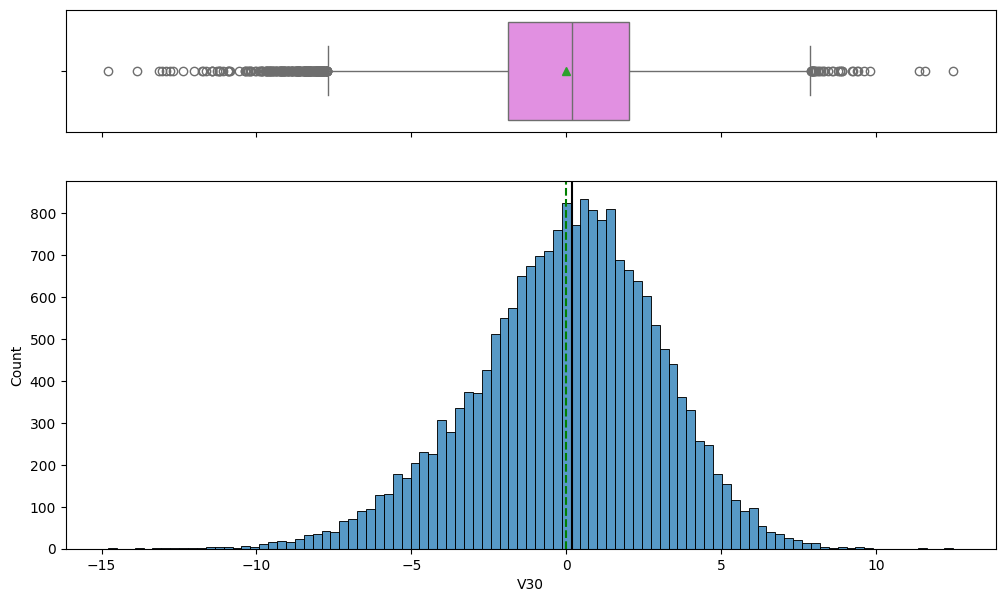

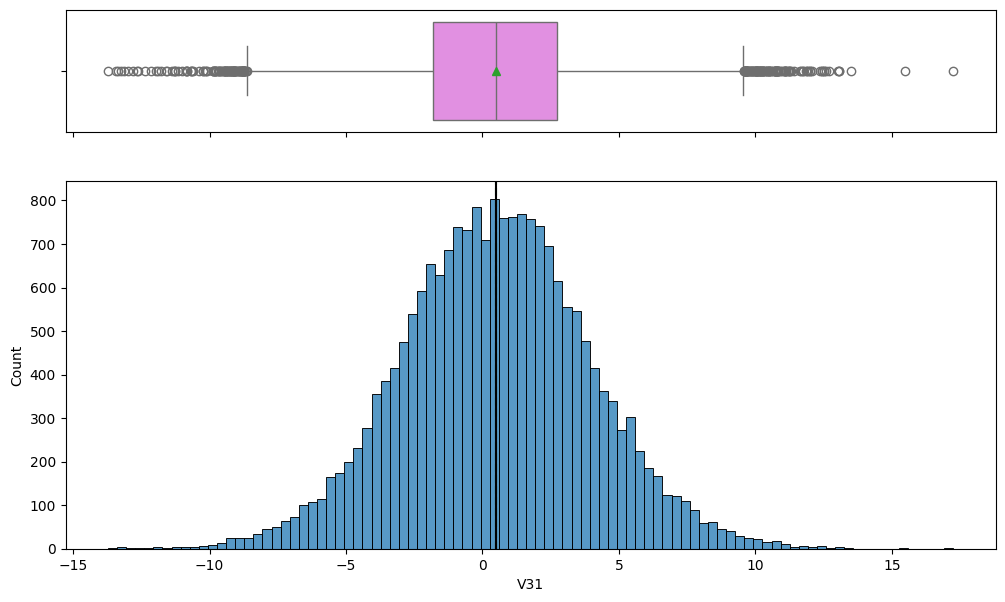

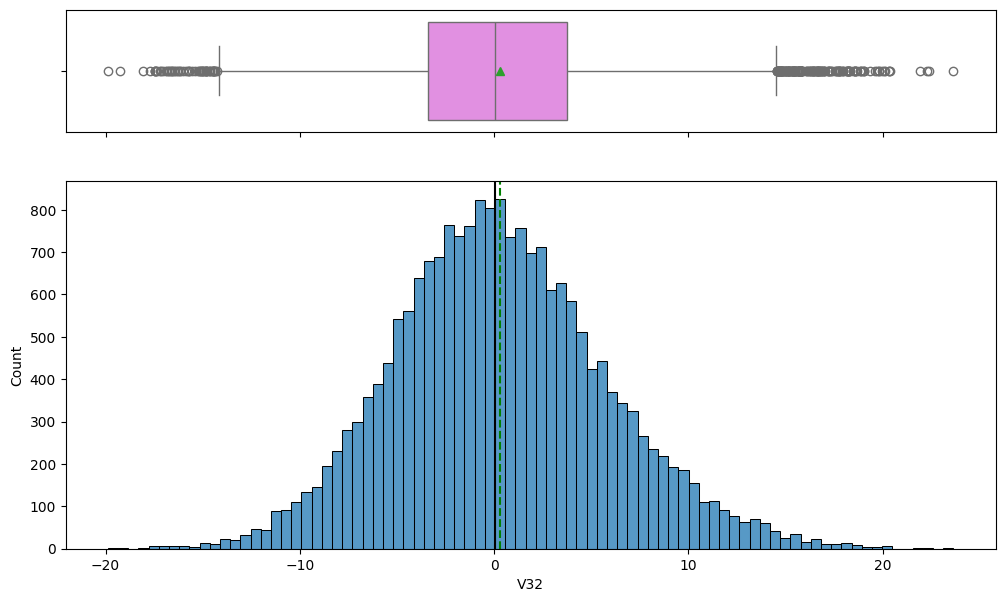

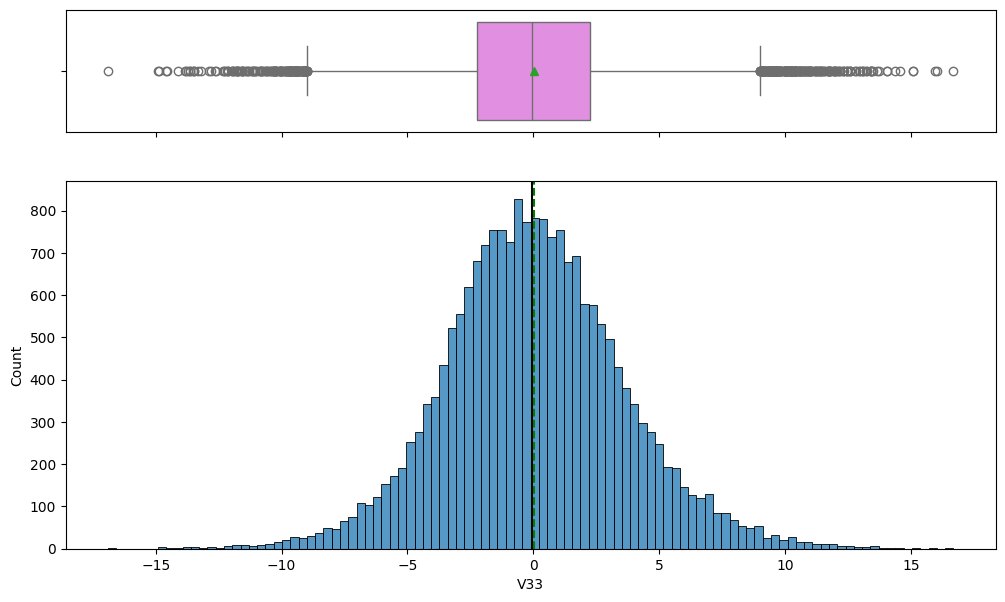

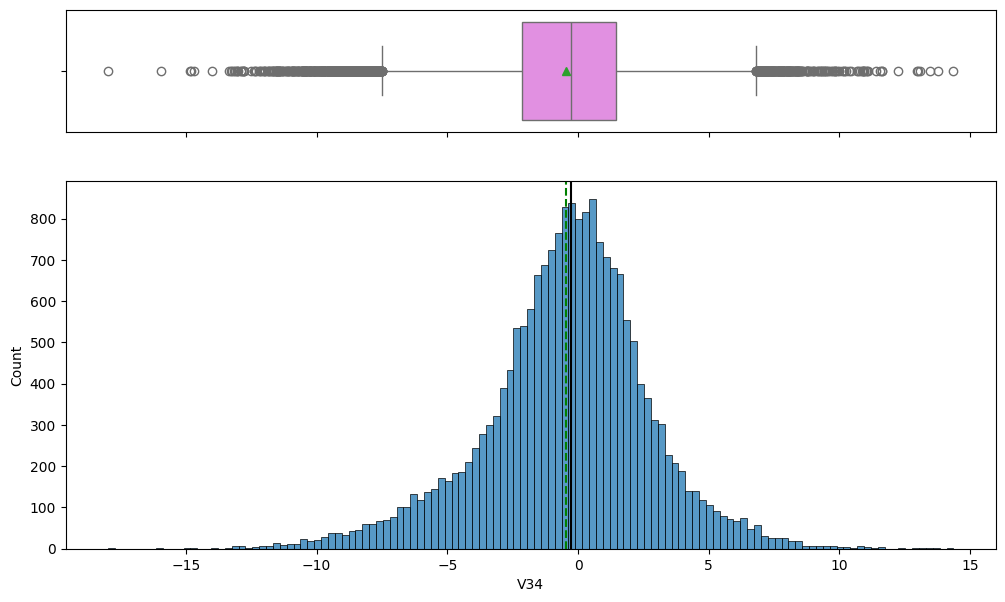

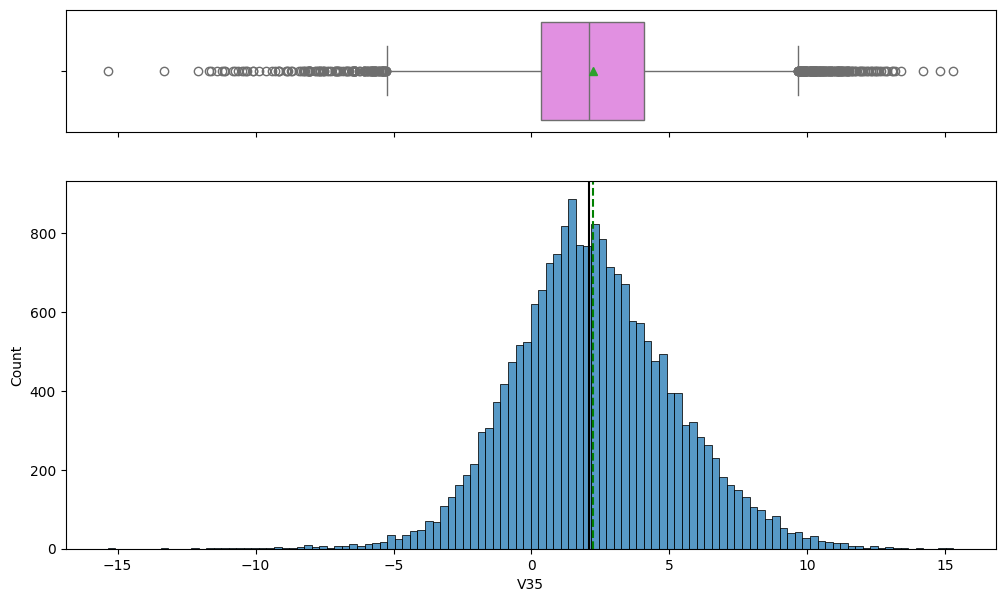

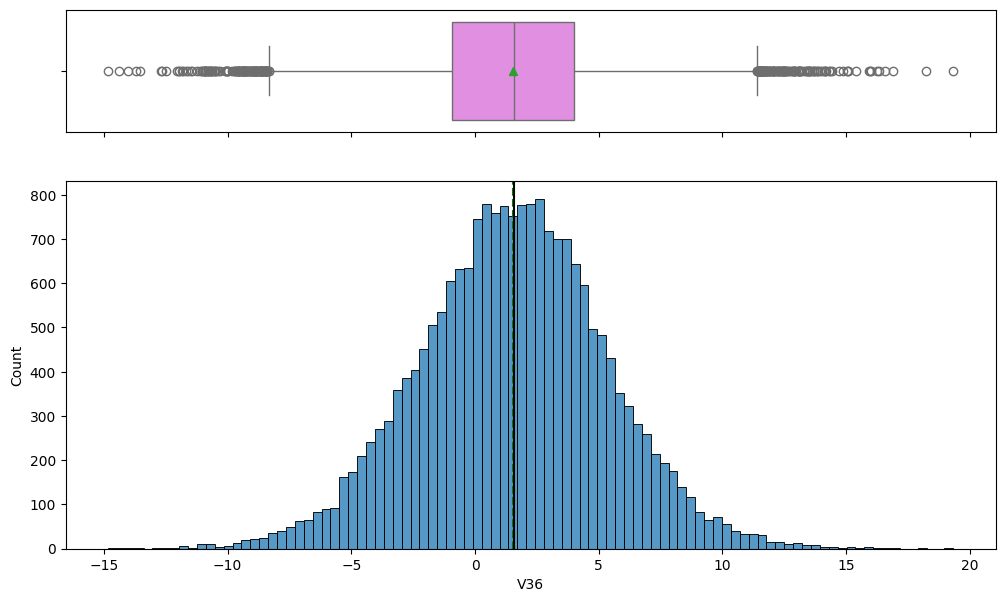

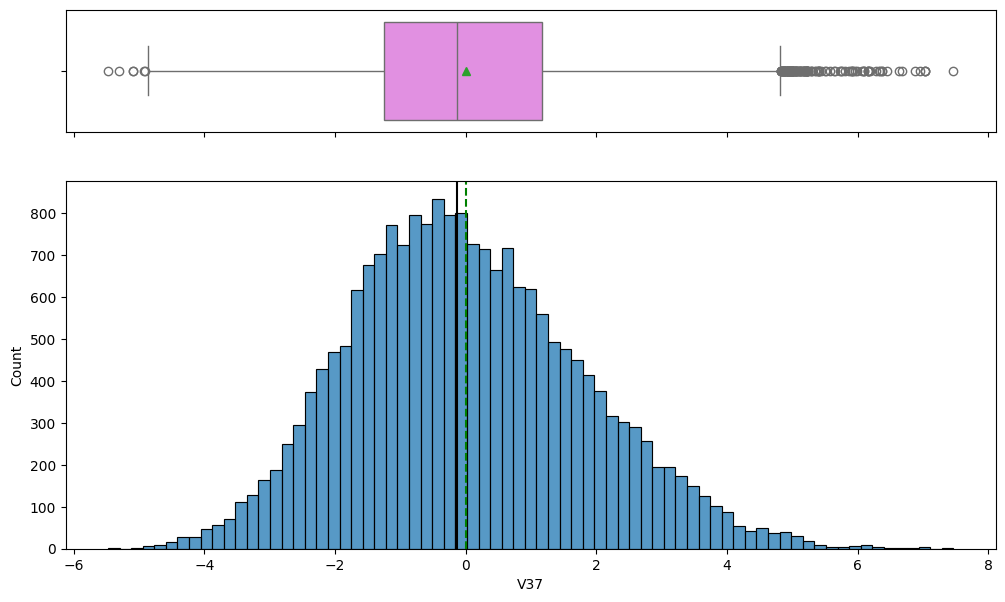

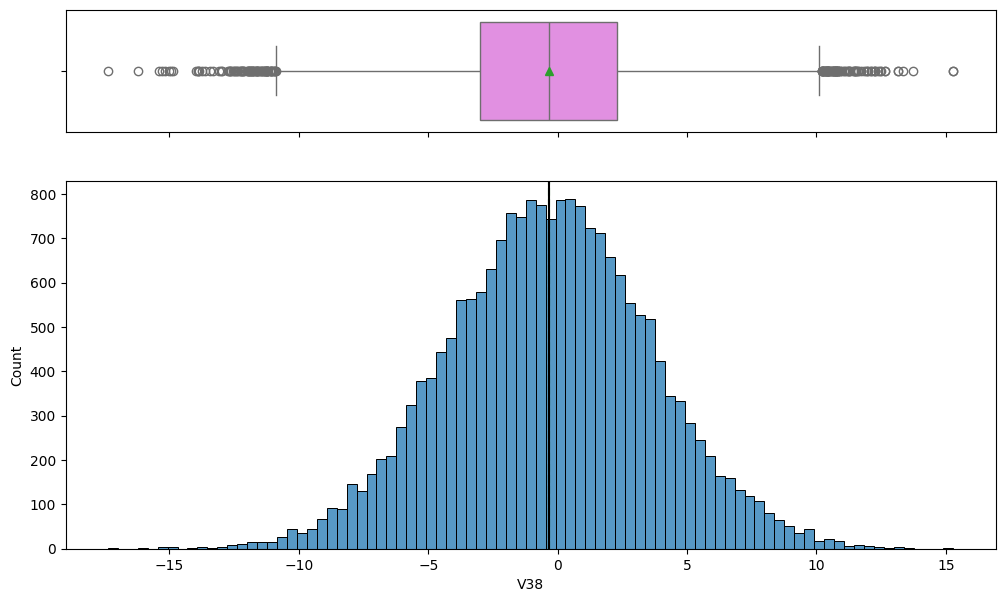

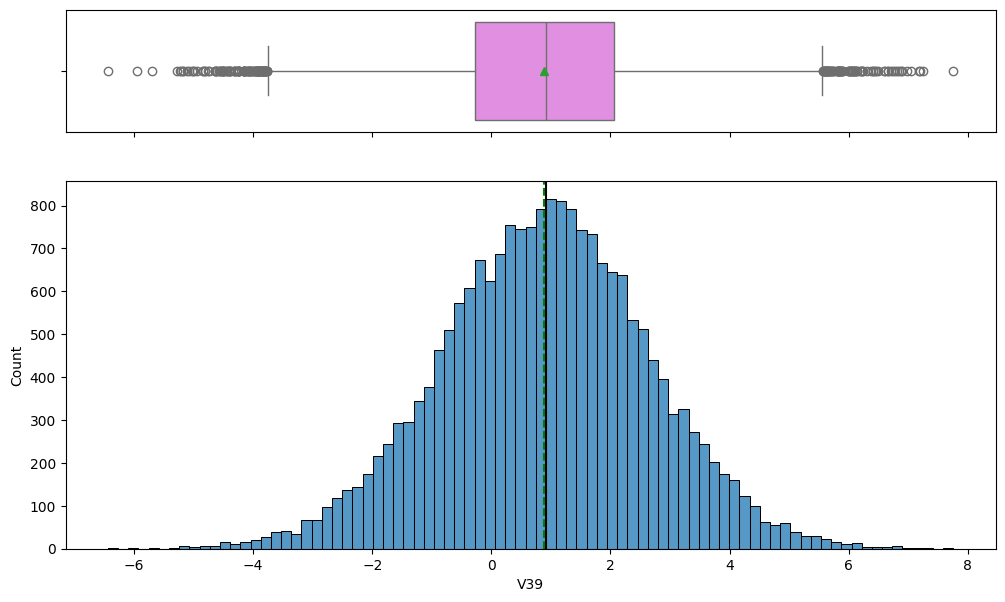

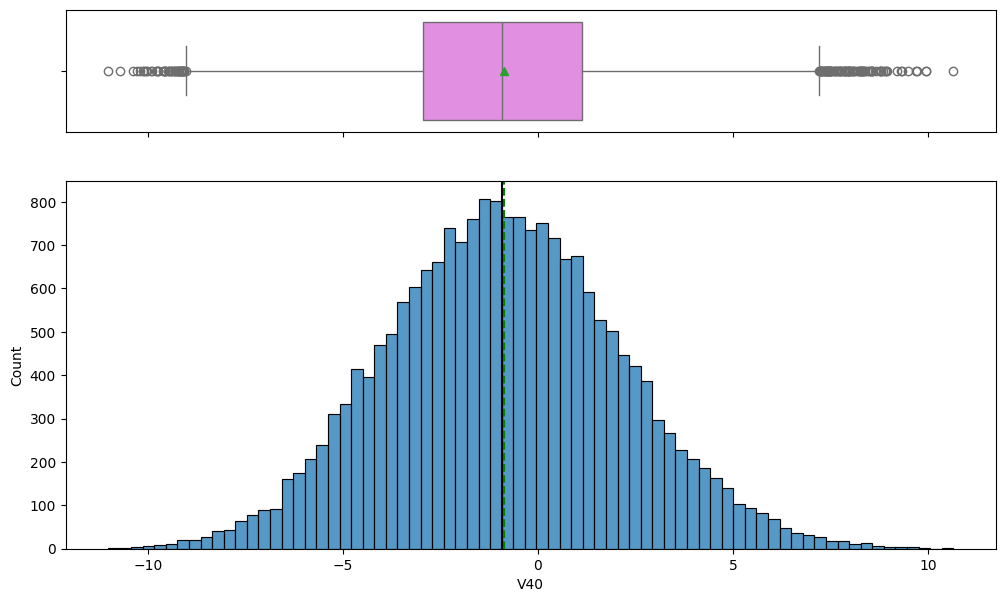

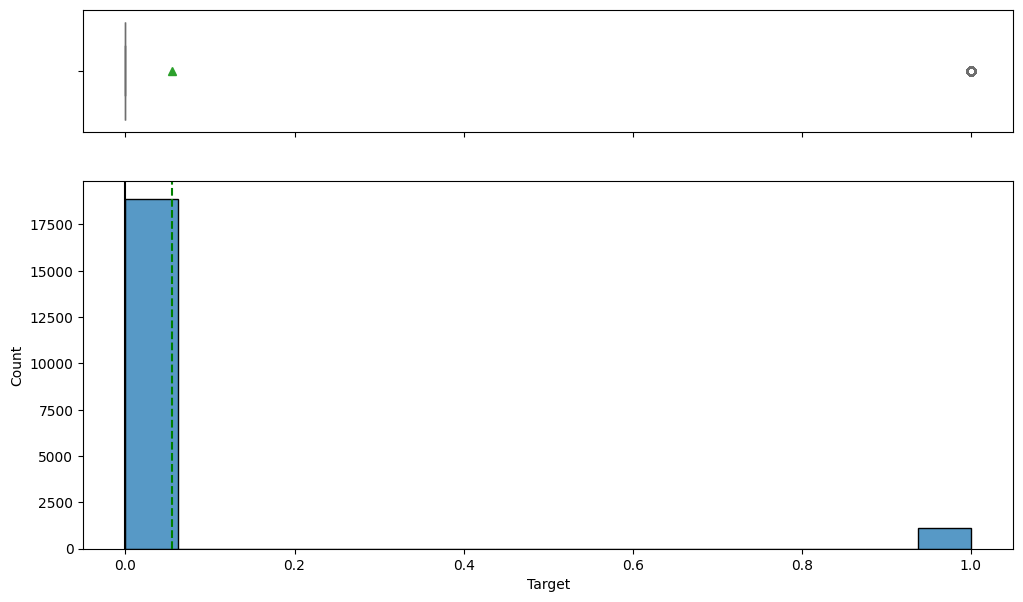

In [ ]:
for feature in ReneWind_train_df_cp.columns:
    histogram_boxplot(ReneWind_train_df_cp, feature, figsize=(12, 7), kde=False, bins=None) ## Please change the dataframe name as you define while reading the data

**Observations**

1. Right-Skewed Distributions: Variables such as V1, V18, and V37 are right-skewed, with mean values greater than their medians, indicating more values concentrated on the lower end.
2. Slightly Right-Skewed Distributions: Variables like V3, V24, V29, and V32 are slightly right-skewed, with moderate differences between mean and median.
3. Slightly Left-Skewed Distributions: Variables such as V8, V10, V17, and V23 are slightly left-skewed, where mean values are slightly smaller than their medians.
4. Left-Skewed Distributions: Variables V16 and V30 show left-skewed distributions with noticeable differences between mean and median.
5. Symmetric or Near-Symmetric Distributions: The remaining variables exhibit symmetric or near-symmetric distributions, where mean and median values are closely aligned.

### Checking Class Distribution

`Training Set`

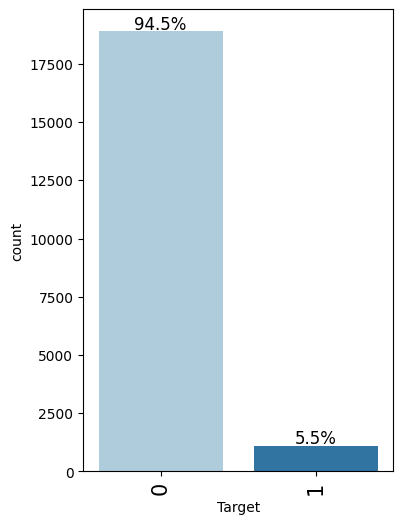

In [ ]:
labeled_barplot(ReneWind_train_df_cp, "Target", perc=True)

In [ ]:
ReneWind_train_df_cp["Target"].value_counts(1)

,proportion
Target,
0,0.945
1,0.056


**Observations**

1. Class Imbalance: The dataset exhibits a significant class imbalance, with the majority class (0, representing "No failure") comprising 94.5% of the data, while the minority class (1, representing "Failure") constitutes only 5.5%.

2. Implication for Modeling: This imbalance suggests that the model could be biased toward predicting the majority class unless steps are taken to address this issue, such as using techniques like oversampling, undersampling, or employing class-weighted algorithms.

3. Potential Costs: Since the minority class represents actual failures, addressing this imbalance is crucial to ensure the model does not overlook these cases, which are more critical for predictive maintenance.

4. Techniques such as oversampling the minority class (e.g., SMOTE), undersampling the majority class (Random Sampler)or using cost-sensitive learning approaches could help address this imbalance during model training and evaluation.

5. Model Evaluation: Special care must be taken during model evaluation to ensure that metrics such as recall and precision are emphasized for the minority class (1) to prevent the model from being overly biased toward the majority class.

`Testing Set`

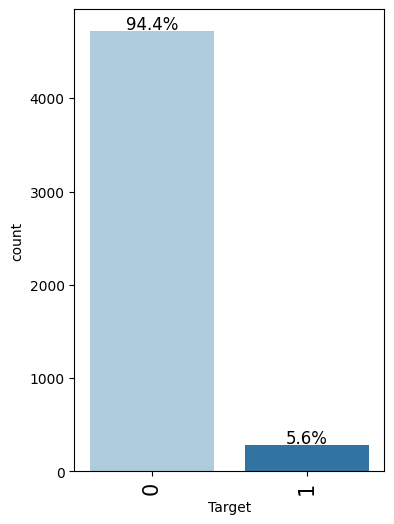

In [ ]:
labeled_barplot(ReneWind_test_df_cp, "Target", perc=True)

In [ ]:
ReneWind_test_df_cp["Target"].value_counts(1)

,proportion
Target,
0,0.944
1,0.056


**Observations**

Similar to the training dataset, the testing dataset exhibits a significant class imbalance, with the majority class (0, "No failure") constituting 94.4% and the minority class (1, "Failure") making up 5.6%. This consistency ensures alignment in evaluating the model's performance.

### Correlation Check

In [20]:
def plot_correlation_heatmap(data, title="Correlation Heatmap",figsize=(12, 7)):
    """
    Plots a heatmap of the correlation matrix for the given dataset.

    Parameters:
    - data (DataFrame): The dataset containing the columns to analyze.
    - figsize (tuple): The size of the heatmap figure. Default is (12, 7).

    Returns:
    - None: Displays the heatmap.
    """
    # Set the figure size
    plt.figure(figsize=figsize)

    # Plot a heatmap to visualize the correlation matrix of the selected numeric columns
    sns.heatmap(
        data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
    )

    # Add a title to the heatmap
    plt.suptitle(title, fontsize=10, y=1.05)

    # Adjust spacing for a tighter layout
    plt.tight_layout()

    # Display the heatmap
    plt.show()

In [19]:
# Splitting the columns into groups for correlation analysis
# This step is done to simplify the heatmap visualization by reducing the number of features analyzed at once.
# Each group contains 10 independent variables (features) along with the target variable.


# Combining columns V1 to V10 and the target column for correlation analysis
v1_v10_target  = pd.concat([ReneWind_test_df_cp.iloc[:, 0:10], ReneWind_test_df_cp.iloc[:, -1]], axis=1)

# Combining columns V11 to V20 and the target column for correlation analysis
v11_v20_target = pd.concat([ReneWind_test_df_cp.iloc[:, 10:20], ReneWind_test_df_cp.iloc[:, -1]], axis=1)

# Combining columns V21 to V30 and the target column for correlation analysis
v21_v30_target = pd.concat([ReneWind_test_df_cp.iloc[:, 20:30], ReneWind_test_df_cp.iloc[:, -1]], axis=1)

# Combining columns V31 to V40 and the target column for correlation analysis
v31_v40_target = pd.concat([ReneWind_test_df_cp.iloc[:, 30:40], ReneWind_test_df_cp.iloc[:, -1]], axis=1)


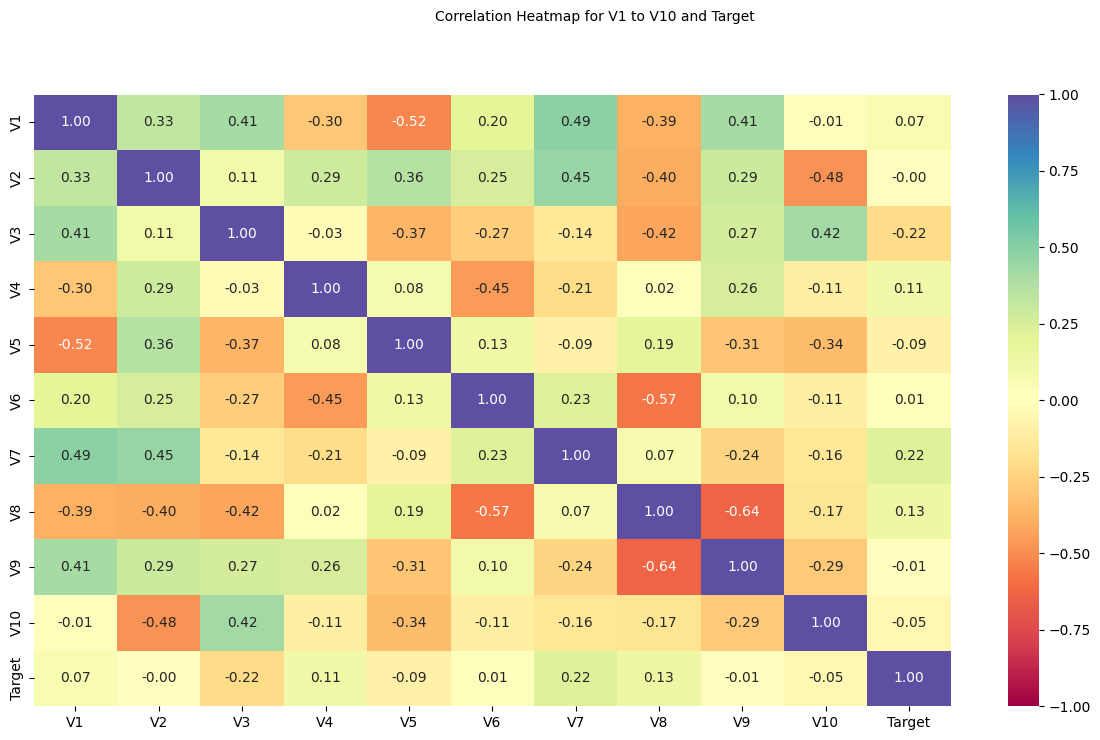

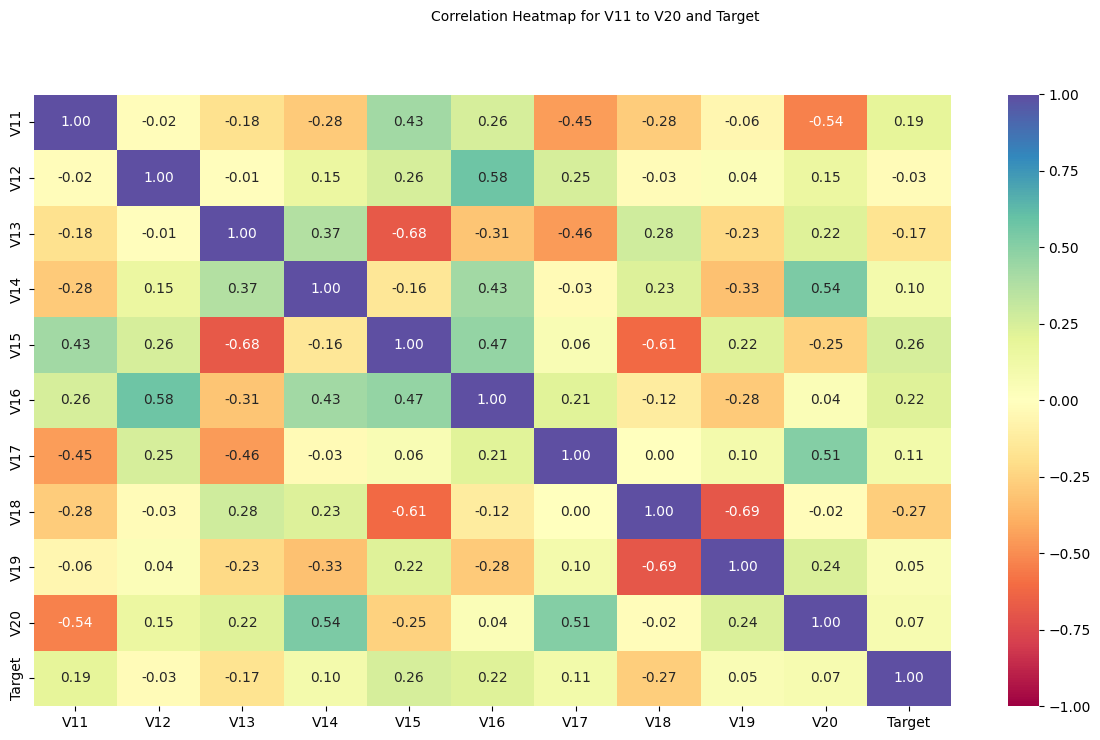

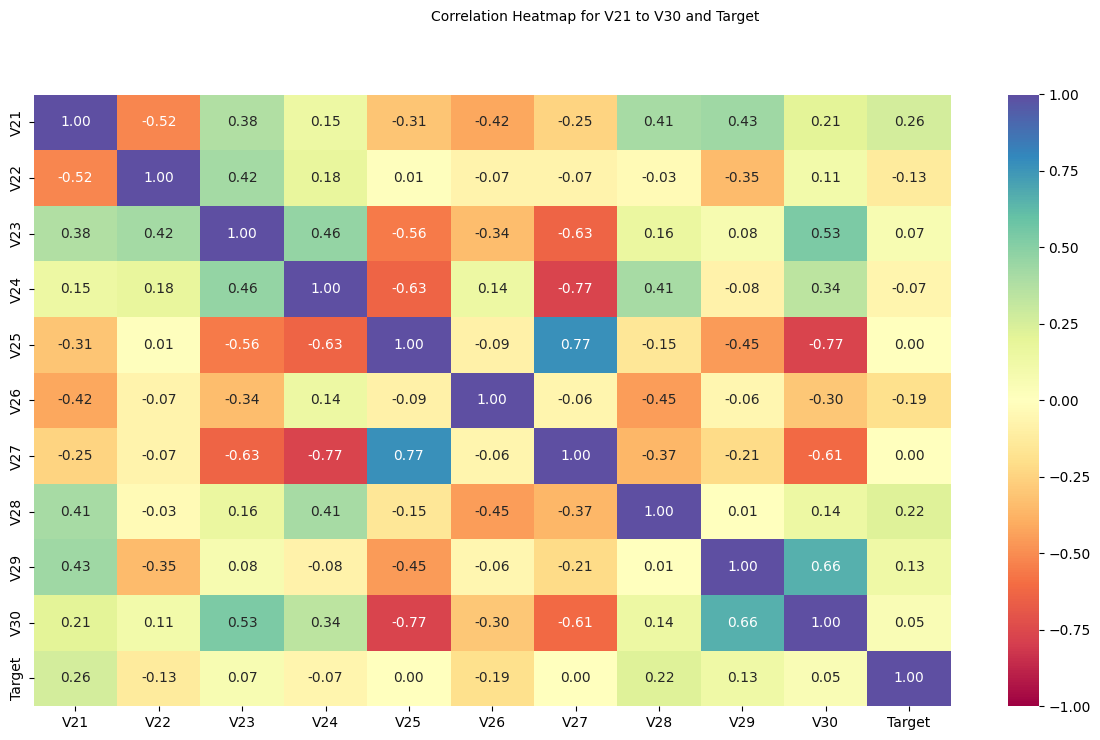

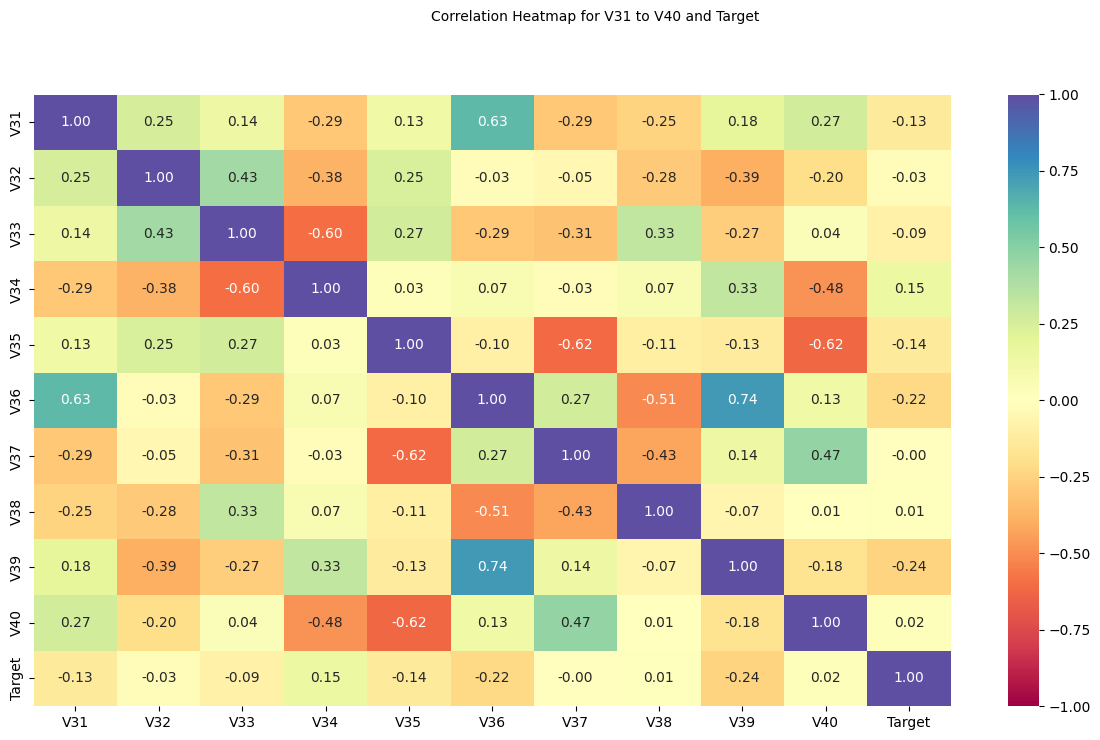

In [21]:
# Plot for V1 to v10 and Target
plot_correlation_heatmap(v1_v10_target,title="Correlation Heatmap for V1 to V10 and Target")

# Plot for V11 to v20 and Target
plot_correlation_heatmap(v11_v20_target,title="Correlation Heatmap for V11 to V20 and Target")

# Plot for V21 to v30 and Target
plot_correlation_heatmap(v21_v30_target,title="Correlation Heatmap for V21 to V30 and Target")

# Plot for V31 to v40 and Target
plot_correlation_heatmap(v31_v40_target,title="Correlation Heatmap for V31 to V40 and Target")

**Observations**

1. **Positive Correlation**: The variables with the strongest positive correlation with the target variable (`Target`) are V15 (0.26) and V21 (0.26), followed by V7 (0.22), V16 (0.22), and V28 (0.22). These features may serve as significant predictors in the model.

2. **Negative Correlation** :The variables with the strongest negative correlation with the target variable (`Target`) are V18 (-0.27) and V39 (-0.24), followed by V3 (-0.22), V36 (-0.22), V26 (-0.19), and V13 (-0.17). These features may also hold significance in influencing the target variable.


## Data Pre-processing

`Training Set`

In [3]:
# Dividing train data into X and y
X = ReneWind_train_df_cp.drop(["Target"], axis=1)
y = ReneWind_train_df_cp["Target"]

#Since we already have a separate test set, we don't need to divide data into train, valiation and test
# Splitting train dataset into training and validation set

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y
)

# Checking the number of rows and columns in the training and validation sets
print(X_train.shape, X_val.shape)


(15000, 40) (5000, 40)


`Testing Set`

In [4]:
# Dividing test data into X_test and y_test
X_test = ReneWind_test_df_cp.drop(["Target"], axis=1)
y_test = ReneWind_test_df_cp["Target"]

# Checking the number of rows and columns in the testing sets
print(X_test.shape)

(5000, 40)


In [5]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])
print ("\n")
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Number of rows in train data = 15000
Number of rows in validation data = 5000
Number of rows in test data = 5000


Percentage of classes in training set:
Target
0   0.945
1   0.055
Name: proportion, dtype: float64
Percentage of classes in validation set:
Target
0   0.944
1   0.056
Name: proportion, dtype: float64
Percentage of classes in test set:
Target
0   0.944
1   0.056
Name: proportion, dtype: float64


## Missing value imputation




In [6]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="median")
cols_to_impute = ["V1", "V2"]

In [7]:
# Fit and transform the train data
X_train[cols_to_impute] = imputer.fit_transform(X_train[cols_to_impute])

# Transform the validation data
X_val[cols_to_impute] = imputer.transform(X_val[cols_to_impute])

# Transform the test data
X_test[cols_to_impute] = imputer.transform(X_test[cols_to_impute])

In [8]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

**Observation**

Missing value issue has been addressed in training , validation and testing sets have been addressed

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [23]:

# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [24]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [11]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

**Important Note**

Xgboost was not inluded in the list of classifies as it reported the error   (**AttributeError: 'super' object has no attribute '__sklearn_tags__'**) while executing below line of code
  cv_result = cross_val_score(   estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold

Based on checks online for similar issue, it appears there is an incompability issue between scikit-learn==1.3.1 and xgboost==2.0.3. I tried other combinations: scikit-learn==1.5.2 and xgboost==2.0.3, scikit-learn==1.5.2 and xgboost==2.1.3 but same error was reported


In [13]:
models = []  # Empty list to store all the models
baseline_train_perf = []   # Empty list to store recall for model on train data
baseline_validation_perf = [] # Empty list to store recall for model on train data

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))

# models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    cv_result_mean = cv_result.mean()
    print("{}: {}".format(name, cv_result_mean))
    baseline_train_perf.append(cv_result_mean)

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))
    baseline_validation_perf.append(scores)


Cross-Validation performance on training dataset:

Logistic regression: 0.4927566553639709
dtree: 0.6982829521679532
Bagging: 0.7210807301060529
Random forest: 0.7235192266070268
Adaboost: 0.5371329629896833
GBM: 0.7066661857008874

Validation Performance:

Logistic regression: 0.4856115107913669
dtree: 0.7050359712230215
Bagging: 0.7302158273381295
Random forest: 0.7266187050359713
Adaboost: 0.6007194244604317
GBM: 0.7230215827338129


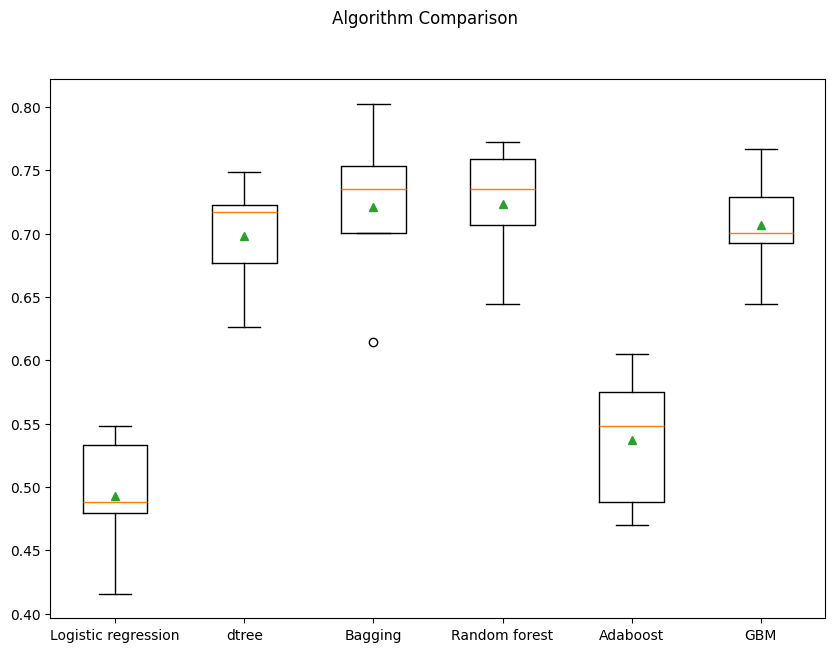

In [14]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1,showmeans=True)
ax.set_xticklabels(names)

plt.show()

**Observations**

Top 3 Models:

1. Bagging consistently outperforms other classifiers, achieving the highest mean recall in both cross-validation (0.7211) and validation performance (0.7302). This confirms its robustness and reliability in recall performance across datasets.
2. Random Forest closely follows Bagging, with slightly higher cross-validation recall (0.7235) but slightly lower validation recall (0.7266). Its performance is comparable to Bagging, making it another strong candidate.
3. GBM exhibits better performance than dtree in both cross-validation (0.7067 vs. 0.6983) and validation (0.7230 vs. 0.7050). This aligns with the higher mean recall observed in the boxplot and highlights GBM’s potential for higher variability while maintaining solid performance.

We will try oversampling and undersampling techniques to see if recall improves for the Six classifiers.

### Model Building with Oversampled data


In [15]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 832
Before OverSampling, counts of label '0': 14168 

After OverSampling, counts of label '1': 14168
After OverSampling, counts of label '0': 14168 

After OverSampling, the shape of train_X: (28336, 40)
After OverSampling, the shape of train_y: (28336,) 



In [16]:
models = []  # Empty list to store all the models
over_sampling_train_perf = []   # Empty list to store recall for model on oversampled train data
_validation_perf_1 = [] # Empty list to store recall for model on validation data

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))

# models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results2 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results2.append(cv_result)
    names.append(name)
    cv_result_mean = cv_result.mean()
    print("{}: {}".format(name, cv_result_mean))
    over_sampling_train_perf.append(cv_result_mean)

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))
    _validation_perf_1.append(scores)



Cross-Validation performance on training dataset:

Logistic regression: 0.883963699328486
dtree: 0.9720494245534969
Bagging: 0.9762141471581656
Random forest: 0.9839075260047615
Adaboost: 0.891445687121811
GBM: 0.9256068151319724

Validation Performance:

Logistic regression: 0.8489208633093526
dtree: 0.7769784172661871
Bagging: 0.8345323741007195
Random forest: 0.8489208633093526
Adaboost: 0.8597122302158273
GBM: 0.8776978417266187


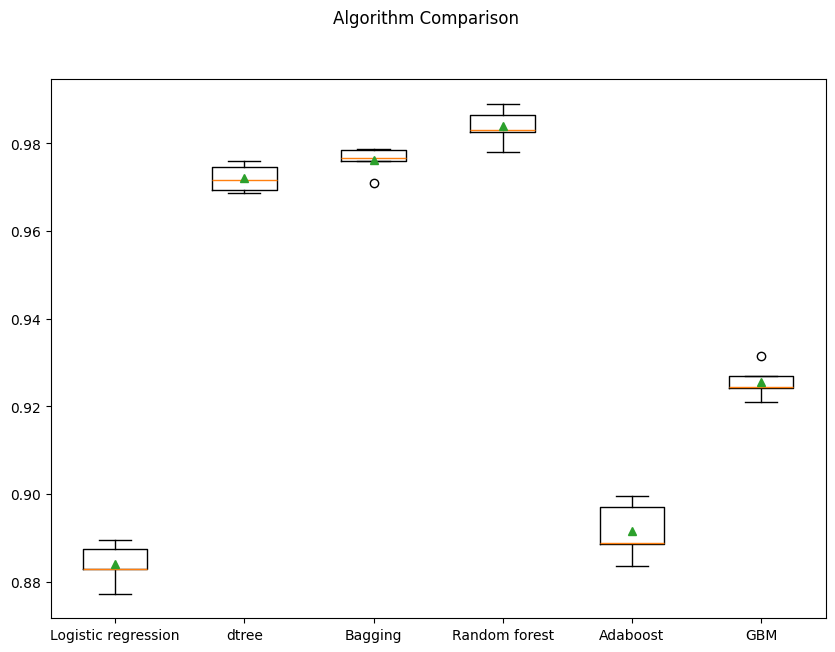

In [19]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results2,showmeans=True)
ax.set_xticklabels(names)

plt.show()

**Observations**

Top 3 Models:

1. Gradient Boosting Machine (GBM):
Gradient Boosting Machine demonstrates strong performance with a validation recall of 0.8777 and a cross-validation recall of 0.9256. The relatively small difference of 0.0479 between the two metrics indicates moderate overfitting, but the model effectively balances training and validation performance. GBM’s high validation recall highlights its ability to generalize well to unseen data, making it a reliable choice for this analysis.

2. Adaboost:
Adaboost achieves a validation recall of 0.8597 and a cross-validation recall of 0.8914. With a minimal difference of 0.0317 between the two scores, Adaboost demonstrates excellent consistency across datasets. This minimal overfitting makes it a dependable model for applications that require consistent performance across training and validation datasets.

3. Logistic Regression:
Logistic Regression demonstrates strong generalization with minimal overfitting across datasets. It achieves a validation recall of 0.8489 and a cross-validation recall of 0.8840, with a small difference of 0.0351, indicating excellent stability and consistent performance. While its validation recall ties with Random Forest, Logistic Regression outperforms it in terms of generalization, as Random Forest exhibits a higher overfitting gap of 0.1350.

### Model Building with Undersampled data

In [20]:
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 832
Before UnderSampling, counts of label '0': 14168 

After UnderSampling, counts of label '1': 832
After UnderSampling, counts of label '0': 832 

After UnderSampling, the shape of train_X: (1664, 40)
After UnderSampling, the shape of train_y: (1664,) 



In [21]:
models = []  # Empty list to store all the models
under_sampling_train_perf = []   # Empty list to store recall for model on undersampled train data
_validation_perf_2 = [] # Empty list to store recall for model on validation data

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))

# models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results3 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results3.append(cv_result)
    names.append(name)
    cv_result_mean = cv_result.mean()
    print("{}: {}".format(name, cv_result_mean))
    under_sampling_train_perf.append(cv_result_mean)

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))
    _validation_perf_2.append(scores)



Cross-Validation performance on training dataset:

Logistic regression: 0.8726138085275232
dtree: 0.8617776495202367
Bagging: 0.8641945025611427
Random forest: 0.9038669648654498
Adaboost: 0.8665969266286705
GBM: 0.8978572974532861

Validation Performance:

Logistic regression: 0.8525179856115108
dtree: 0.841726618705036
Bagging: 0.8705035971223022
Random forest: 0.8920863309352518
Adaboost: 0.8633093525179856
GBM: 0.8884892086330936


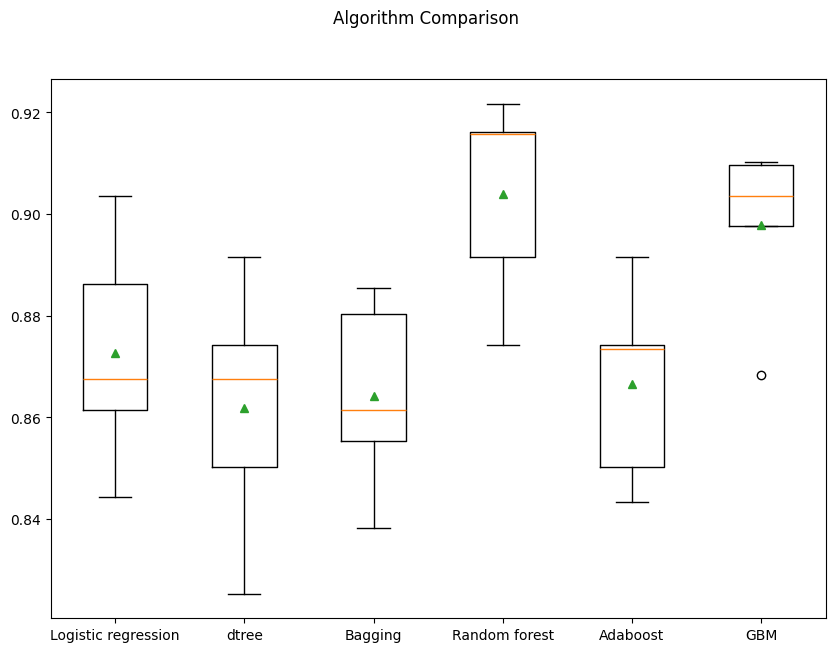

In [22]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results3,showmeans=True)
ax.set_xticklabels(names)

plt.show()

**Observations**

Top 3 Models:

1. Random Forest:
   Random Forest stands out with a cross-validation recall of 0.9039 and a validation recall of 0.8921, showcasing strong and consistent performance. The small difference of 0.0118 between the two metrics indicates minimal overfitting, highlighting the model's ability to generalize effectively. Random Forest is a robust choice, combining excellent training performance with reliable validation results, making it highly adaptable to unseen data.

3. Gradient Boosting Machine (GBM):
   GBM demonstrates reliable performance with a cross-validation recall of 0.8979 and a validation recall of 0.8885. The modest difference of 0.0094 between training and validation metrics suggests minimal overfitting, emphasizing GBM's capacity to generalize well. Although slightly outperformed by Random Forest, GBM remains a top contender due to its consistent and strong recall across datasets.

3. Bagging:
   Bagging exhibits impressive validation performance, achieving a validation recall of 0.8705, slightly higher than its cross-validation recall of 0.8642. The improvement of 0.0063 from training to validation suggests no overfitting and a strong ability to handle unseen data effectively. While its overall recall is slightly lower than Random Forest and GBM, Bagging’s robust generalization makes it a solid option in this scenario.

###  Choose 3 best models (at least) among the 18 models built using original data , oversampled data and undersampled data

In [23]:
# Create individual DataFrames
base_df = pd.DataFrame({
    'Model': names,
    'Train Recall Base': baseline_train_perf,
    'Validation Recall Base': baseline_validation_perf
})

over_df = pd.DataFrame({
    'Model': names,
    'Train Recall Over_S': over_sampling_train_perf,
    'Validation Recall Over_S': _validation_perf_1
})

under_df = pd.DataFrame({
    'Model': names,
    'Train Recall Under_S': under_sampling_train_perf,
    'Validation Recall Under_S': _validation_perf_2
})

# Merge the DataFrames on the 'Model' column
merged_df = pd.concat([base_df, over_df.iloc[:, 1:], under_df.iloc[:, 1:]], axis=1)

# Display the merged DataFrame
merged_df

,Model,Train Recall Base,Validation Recall Base,Train Recall Over_S,Validation Recall Over_S,Train Recall Under_S,Validation Recall Under_S
0,Logistic regression,0.493,0.486,0.884,0.849,0.873,0.853
1,dtree,0.698,0.705,0.972,0.777,0.862,0.842
2,Bagging,0.721,0.730,0.976,0.835,0.864,0.871
3,Random forest,0.724,0.727,0.984,0.849,0.904,0.892
4,Adaboost,0.537,0.601,0.891,0.860,0.867,0.863
5,GBM,0.707,0.723,0.926,0.878,0.898,0.888


Top 4 Models for Hyperparameter Tuning:

1. Gradient Boosting Machine (GBM):
GBM performs consistently across all three scenarios, demonstrating high Validation Recall and minimal overfitting. It’s the most reliable and robust model overall.

2. Bagging:
Bagging excels in the Original and Undersampled scenarios, showcasing strong Validation Recall and minimal overfitting. Its performance is consistent and reliable.

3. Random Forest:
Random Forest matches Bagging in the Original and Undersampled scenarios. It delivers competitive Validation Recall and strong generalization, particularly in the Undersampled dataset.

4. Adaboost
Adaboost demonstrates strong performance across sampled datasets, achieving high validation recall in the Oversampled (0.860) and Undersampled (0.863) scenarios with minimal overfitting (gaps of 0.031 and 0.004, respectively). Its adaptability and ability to generalize effectively to unseen data across these scenarios justify its inclusion in the top 4 models.

## HyperparameterTuning

### Tuning Gradient Boosting  - RandomSearchCV with Hyperparameter on Original, Undersampled and Oversampled Datasets

`Original Data`

In [52]:
%%time

# defining model for the Original Dataset
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV

param_grid = { "n_estimators": np.arange(100,150,25),
              "learning_rate": [0.2, 0.05, 1],
               "subsample":[0.5,0.7],
               "max_features":[0.5,0.7]
               }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Setting number of splits equal to 5
kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=kfold, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv = randomized_cv.fit(X_train , y_train)

# Set the clf to the best combination of parameters
gb_original_tuned = randomized_cv.best_estimator_

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

# Fit the best algorithm to the data.
gb_original_tuned.fit(X_train, y_train)

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.7571098766322776:
CPU times: user 46.5 s, sys: 1.41 s, total: 48 s
Wall time: 22min 37s


GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, random_state=1, subsample=0.7)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.994   0.906      0.984 0.944
Validationg performance:
    Accuracy  Recall  Precision    F1
0     0.982   0.773      0.885 0.825


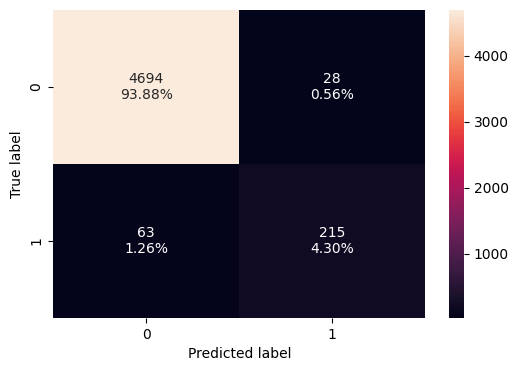

In [53]:
#Calculating different metrics
gb_original_tuned_train_perf=model_performance_classification_sklearn(gb_original_tuned,X_train,y_train)
print("Training performance:\n",gb_original_tuned_train_perf)

gb_original_tuned_validation_perf=model_performance_classification_sklearn(gb_original_tuned,X_val,y_val)
print("Validationg performance:\n",gb_original_tuned_validation_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_original_tuned,X_val,y_val)

`Undersampled Data`

In [35]:
%%time

# defining model for the Undersampled Dataset
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV

param_grid = { "n_estimators": np.arange(100,150,25),
              "learning_rate": [0.2, 0.05, 1],
               "subsample":[0.5,0.7],
               "max_features":[0.5,0.7]
               }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Setting number of splits equal to 5
kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=kfold, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv = randomized_cv.fit(X_train_un , y_train_un)

# Set the clf to the best combination of parameters
gb_undersample_tuned = randomized_cv.best_estimator_

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

# Fit the best algorithm to the data.
gb_undersample_tuned.fit(X_train_un, y_train_un)

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.9014573263112329:
CPU times: user 5.88 s, sys: 311 ms, total: 6.19 s
Wall time: 2min 46s


GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, random_state=1, subsample=0.7)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.992   0.986      0.998 0.992
Validationg performance:
    Accuracy  Recall  Precision    F1
0     0.927   0.881      0.423 0.572


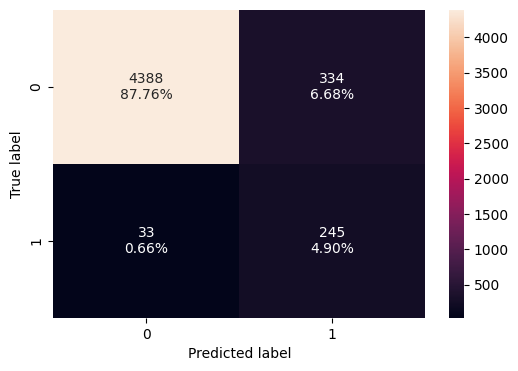

In [37]:
#Calculating different metrics
gb_undersample_tuned_train_perf=model_performance_classification_sklearn(gb_undersample_tuned,X_train_un,y_train_un)
print("Training performance:\n",gb_undersample_tuned_train_perf)

gb_undersample_tuned_validation_perf=model_performance_classification_sklearn(gb_undersample_tuned,X_val,y_val)
print("Validationg performance:\n",gb_undersample_tuned_validation_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_undersample_tuned,X_val,y_val)

`Oversampled Data`

In [38]:
%%time

# defining model for the Oversampled Dataset
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV

param_grid = { "n_estimators": np.arange(100,150,25),
              "learning_rate": [0.2, 0.05, 1],
               "subsample":[0.5,0.7],
               "max_features":[0.5,0.7]
               }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Setting number of splits equal to 5
kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=kfold, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv = randomized_cv.fit(X_train_over , y_train_over)

# Set the clf to the best combination of parameters
gb_oversample_tuned = randomized_cv.best_estimator_

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

# Fit the best algorithm to the data.
gb_oversample_tuned.fit(X_train_over, y_train_over)

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 1} with CV score=0.9704964002988271:
CPU times: user 1min 39s, sys: 7.23 s, total: 1min 46s
Wall time: 45min 27s


GradientBoostingClassifier(learning_rate=1, max_features=0.5, n_estimators=125,
                           random_state=1, subsample=0.7)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.993   0.993      0.994 0.993
Validationg performance:
    Accuracy  Recall  Precision    F1
0     0.971   0.845      0.693 0.762


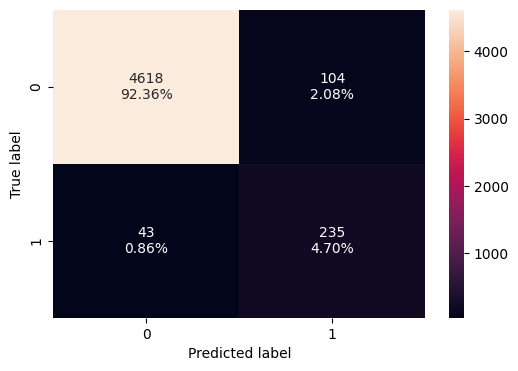

In [39]:
#Calculating different metrics
gb_oversample_tuned_train_perf=model_performance_classification_sklearn(gb_oversample_tuned,X_train_over,y_train_over)
print("Training performance:\n",gb_oversample_tuned_train_perf)

gb_oversample_tuned_validation_perf=model_performance_classification_sklearn(gb_oversample_tuned,X_val,y_val)
print("Validationg performance:\n",gb_oversample_tuned_validation_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_oversample_tuned,X_val,y_val)

### Tuning Bagging  - RandomSearchCV with Hyperparameter on Orginal and Undersampled Datasets

`Original Data`

In [30]:
%%time

# defining model for the Original Dataset
model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
    }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Setting number of splits equal to 5
kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=kfold, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv = randomized_cv.fit(X_train , y_train)

# Set the clf to the best combination of parameters
bagging_original_tuned = randomized_cv.best_estimator_

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

# Fit the best algorithm to the data.
bagging_original_tuned.fit(X_train, y_train)

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.8} with CV score=0.7318880311665825:
CPU times: user 3min 48s, sys: 4.77 s, total: 3min 53s
Wall time: 1h 2min 40s


BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=70,
                  random_state=1)

Training performance:
    Accuracy  Recall  Precision    F1
0     1.000   0.994      1.000 0.997
Validation performance:
    Accuracy  Recall  Precision    F1
0     0.984   0.741      0.972 0.841


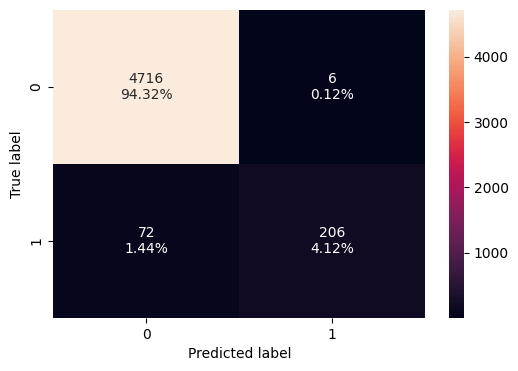

In [32]:
#Calculating different metrics
bagging_original_tuned_train_perf=model_performance_classification_sklearn(bagging_original_tuned,X_train,y_train)
print("Training performance:\n",bagging_original_tuned_train_perf)

bagging_original_tuned_validation_perf=model_performance_classification_sklearn(bagging_original_tuned,X_val,y_val)
print("Validation performance:\n",bagging_original_tuned_validation_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_original_tuned,X_val,y_val)

`Undersampled Data`

In [26]:
%%time

# defining model for the Undersampled Dataset
model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
    }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Setting number of splits equal to 5
kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=kfold, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv = randomized_cv.fit(X_train_un , y_train_un)

# Set the clf to the best combination of parameters
bagging_undersample_tuned = randomized_cv.best_estimator_

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

# Fit the best algorithm to the data.
bagging_undersample_tuned.fit(X_train_un, y_train_un)

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.9} with CV score=0.8990693312170839:
CPU times: user 13.2 s, sys: 307 ms, total: 13.5 s
Wall time: 3min 16s


BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=70,
                  random_state=1)

Training performance:
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
Validationg performance:
    Accuracy  Recall  Precision    F1
0     0.938   0.892      0.470 0.615


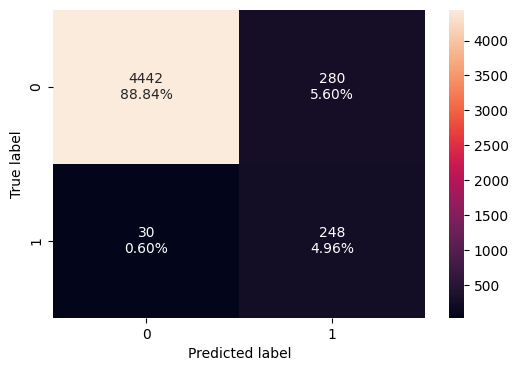

In [34]:
# Set the clf to the best combination of parameters
#bagging_undersample_tuned = BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=70, random_state=1)

# Fit the best algorithm to the data.
#bagging_undersample_tuned.fit(X_train_un, y_train_un)

#Calculating different metrics
bagging_undersample_tuned_train_perf=model_performance_classification_sklearn(bagging_undersample_tuned,X_train_un,y_train_un)
print("Training performance:\n",bagging_undersample_tuned_train_perf)

bagging_undersample_tuned_validation_perf=model_performance_classification_sklearn(bagging_undersample_tuned,X_val,y_val)
print("Validationg performance:\n",bagging_undersample_tuned_validation_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_undersample_tuned,X_val,y_val)

### Tuning Random Forest - RandomSearchCV with Hyperparameter on Orignal and Undersampled Datasets

`Original Data`

In [42]:
%%time

# defining model for the Original Dataset
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV

param_grid = {
     "n_estimators": [200,250,300],
     "min_samples_leaf": np.arange(1, 4),
     "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
     "max_samples": np.arange(0.4, 0.7, 0.1)
      }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Setting number of splits equal to 5
kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=kfold, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv = randomized_cv.fit(X_train , y_train)

# Set the clf to the best combination of parameters
rf_original_tuned = randomized_cv.best_estimator_

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

# Fit the best algorithm to the data.
rf_original_tuned.fit(X_train, y_train)

Best parameters are {'n_estimators': 200, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.7054469374504004:
CPU times: user 1min 34s, sys: 4.35 s, total: 1min 38s
Wall time: 51min 50s


RandomForestClassifier(max_samples=0.6, n_estimators=200, random_state=1)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.995   0.906      1.000 0.951
Validation performance:
    Accuracy  Recall  Precision    F1
0     0.983   0.709      0.985 0.824


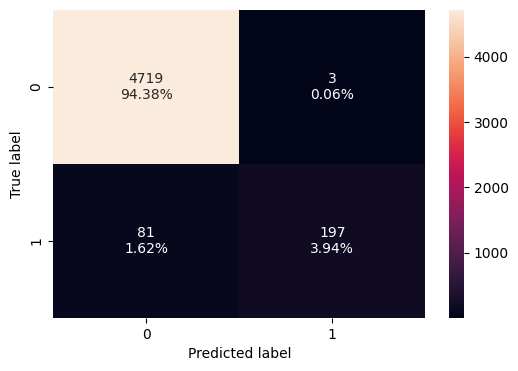

In [44]:
#Calculating different metrics
rf_original_tuned_train_perf=model_performance_classification_sklearn(rf_original_tuned,X_train,y_train)
print("Training performance:\n",rf_original_tuned_train_perf)

rf_original_tuned_validation_perf=model_performance_classification_sklearn(rf_original_tuned,X_val,y_val)
print("Validation performance:\n",rf_original_tuned_validation_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_original_tuned,X_val,y_val)

`Undersampled Data`

In [40]:
%time

# defining model for the Undersampled Dataset
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
     "n_estimators": [200,250,300],
     "min_samples_leaf": np.arange(1, 4),
     "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
     "max_samples": np.arange(0.4, 0.7, 0.1)
      }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Setting number of splits equal to 5
kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=kfold, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv = randomized_cv.fit(X_train_un , y_train_un)

# Set the clf to the best combination of parameters
rf_undersample_tuned = randomized_cv.best_estimator_

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

# Fit the best algorithm to the data.
rf_undersample_tuned.fit(X_train_un, y_train_un)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs
Best parameters are {'n_estimators': 250, 'min_samples_leaf': 3, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9002597215208137:


RandomForestClassifier(max_samples=0.6, min_samples_leaf=3, n_estimators=250,
                       random_state=1)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.959   0.929      0.987 0.957
Validation performance:
    Accuracy  Recall  Precision    F1
0     0.941   0.885      0.484 0.626


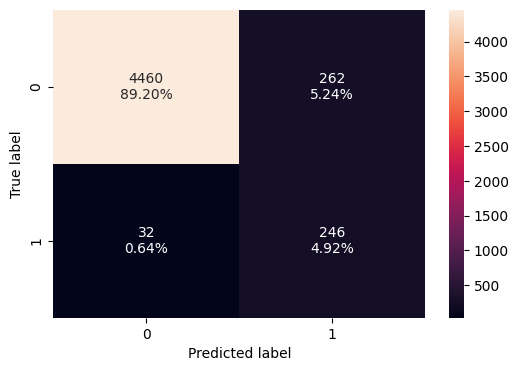

In [41]:
#Calculating different metrics
rf_undersample_tuned_train_perf=model_performance_classification_sklearn(rf_undersample_tuned,X_train_un,y_train_un)
print("Training performance:\n",rf_undersample_tuned_train_perf)

rf_undersample_tuned_validation_perf=model_performance_classification_sklearn(rf_undersample_tuned,X_val,y_val)
print("Validation performance:\n",rf_undersample_tuned_validation_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_undersample_tuned,X_val,y_val)

### Tuning AdaBoost - RandomSearchCV with Hyperparameter Undersampled and Oversampled Datasets

`Undersampled Data`

In [48]:
%time

# defining model for the Undersampled Dataset
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1),
                       DecisionTreeClassifier(max_depth=2, random_state=1),
                       DecisionTreeClassifier(max_depth=3, random_state=1),
                       ],
    }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Setting number of splits equal to 5
kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=kfold, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv = randomized_cv.fit(X_train_un , y_train_un)

# Set the clf to the best combination of parameters
adb_undersample_tuned = randomized_cv.best_estimator_

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

# Fit the best algorithm to the data.
adb_undersample_tuned.fit(X_train_un, y_train_un)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.7 µs
Best parameters are {'n_estimators': 150, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8906500252507035:


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.2, n_estimators=150, random_state=1)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.953   0.922      0.982 0.951
Validation performance:
    Accuracy  Recall  Precision    F1
0     0.928   0.885      0.430 0.579


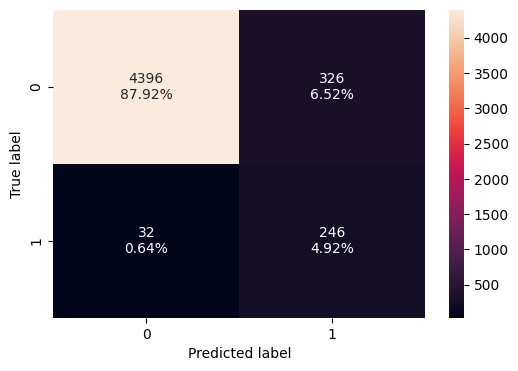

In [49]:
#Calculating different metrics
adb_undersample_tuned_train_perf=model_performance_classification_sklearn(adb_undersample_tuned,X_train_un,y_train_un)
print("Training performance:\n",adb_undersample_tuned_train_perf)

adb_undersample_tuned_validation_perf=model_performance_classification_sklearn(adb_undersample_tuned,X_val,y_val)
print("Validation performance:\n",adb_undersample_tuned_validation_perf)

#Creating confusion matrix
confusion_matrix_sklearn(adb_undersample_tuned,X_val,y_val)

`Oversampled Data`

In [50]:
%time

# defining model for the Oversampled Dataset
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1),
                  DecisionTreeClassifier(max_depth=2, random_state=1),
                  DecisionTreeClassifier(max_depth=3, random_state=1),
                  ],
    }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Setting number of splits equal to 5
kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=kfold, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv = randomized_cv.fit(X_train_over , y_train_over)

# Set the clf to the best combination of parameters
adb_oversample_tuned = randomized_cv.best_estimator_

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

# Fit the best algorithm to the data.
adb_oversample_tuned.fit(X_train_over, y_train_over)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 13.4 µs
Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.917419584337333:


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.2, n_estimators=200, random_state=1)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.941   0.918      0.963 0.940
Validation performance:
    Accuracy  Recall  Precision    F1
0     0.949   0.878      0.526 0.658


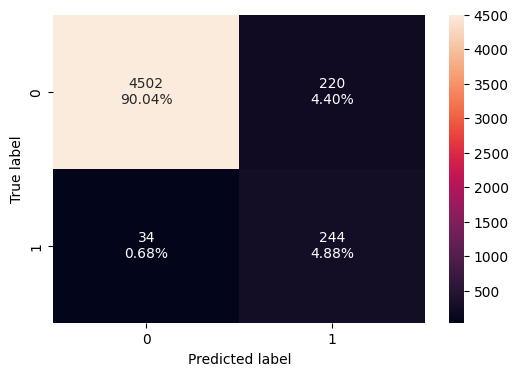

In [51]:
#Calculating different metrics
adb_oversample_tuned_train_perf=model_performance_classification_sklearn(adb_oversample_tuned,X_train_over,y_train_over)
print("Training performance:\n",adb_oversample_tuned_train_perf)

adb_oversample_tuned_validation_perf=model_performance_classification_sklearn(adb_oversample_tuned,X_val,y_val)
print("Validation performance:\n",adb_oversample_tuned_validation_perf)

#Creating confusion matrix
confusion_matrix_sklearn(adb_oversample_tuned,X_val,y_val)

## Model performance comparison and choosing the final model

`Training Performance Comparison`

In [56]:
# training performance comparison

models_train_comp_df = pd.concat(
[
  gb_original_tuned_train_perf.T,
  gb_undersample_tuned_train_perf.T,
  gb_oversample_tuned_train_perf.T,
  bagging_original_tuned_train_perf.T,
  bagging_undersample_tuned_train_perf.T,
  rf_original_tuned_train_perf.T,
  rf_undersample_tuned_train_perf.T,
  adb_undersample_tuned_train_perf.T,
  adb_oversample_tuned_train_perf.T
],axis=1
)

models_train_comp_df.columns = [
    "Gradient Boost Classifier Tuned Original",
    "Gradient Boost Classifier Tuned Undersample",
    "Gradient Boost Classifier Tuned Oversample",
    "Bagging Classifier Tuned Original",
    "Bagging Classifier Tuned Undersample",
    "Random Forest Tuned Original",
    "Random Forest Tuned Undersample",
    "Adabosst Classifier Tuned Undersample ",
    "Adabosst Classifier Tuned Oversample ",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient Boost Classifier Tuned Original,Gradient Boost Classifier Tuned Undersample,Gradient Boost Classifier Tuned Oversample,Bagging Classifier Tuned Original,Bagging Classifier Tuned Undersample,Random Forest Tuned Original,Random Forest Tuned Undersample,Adabosst Classifier Tuned Undersample,Adabosst Classifier Tuned Oversample
Accuracy,0.994,0.992,0.993,1.000,1.000,0.995,0.959,0.953,0.941
Recall,0.906,0.986,0.993,0.994,1.000,0.906,0.929,0.922,0.918
Precision,0.984,0.998,0.994,1.000,1.000,1.000,0.987,0.982,0.963
F1,0.944,0.992,0.993,0.997,1.000,0.951,0.957,0.951,0.940


`Validation Performance Comparison`

In [60]:
# Validation performance comparison

models_validation_comp_df = pd.concat(
[
  gb_original_tuned_validation_perf.T,
  gb_undersample_tuned_validation_perf.T,
  gb_oversample_tuned_validation_perf.T,
  bagging_original_tuned_validation_perf.T,
  bagging_undersample_tuned_validation_perf.T,
  rf_original_tuned_validation_perf.T,
  rf_undersample_tuned_validation_perf.T,
  adb_undersample_tuned_validation_perf.T,
  adb_oversample_tuned_validation_perf.T
],axis=1
)

models_validation_comp_df.columns = [
    "Gradient Boost Classifier Tuned Original",
    "Gradient Boost Classifier Tuned Undersample",
    "Gradient Boost Classifier Tuned Oversample",
    "Bagging Classifier Tuned Original",
    "Bagging Classifier Tuned Undersample",
    "Random Forest Tuned Original",
    "Random Forest Tuned Undersample",
    "Adabosst Classifier Tuned Undersample ",
    "Adabosst Classifier Tuned Oversample "
]

print("Validation performance comparison:")
models_validation_comp_df

Validation performance comparison:


,Gradient Boost Classifier Tuned Original,Gradient Boost Classifier Tuned Undersample,Gradient Boost Classifier Tuned Oversample,Bagging Classifier Tuned Original,Bagging Classifier Tuned Undersample,Random Forest Tuned Original,Random Forest Tuned Undersample,Adabosst Classifier Tuned Undersample,Adabosst Classifier Tuned Oversample
Accuracy,0.982,0.927,0.971,0.984,0.938,0.983,0.941,0.928,0.949
Recall,0.773,0.881,0.845,0.741,0.892,0.709,0.885,0.885,0.878
Precision,0.885,0.423,0.693,0.972,0.470,0.985,0.484,0.430,0.526
F1,0.825,0.572,0.762,0.841,0.615,0.824,0.626,0.579,0.658


**Final Model Selection**

Overview:
The goal of this analysis is to identify the best classification model to predict generator failures in wind turbines, enabling predictive maintenance to reduce operational costs for ReneWind. In this context, minimizing false negatives (failures not detected by the model) is crucial because undetected failures lead to expensive generator replacements. Thus, recall is the most important metric, as it measures the model's ability to correctly identify actual failures (True Positives).

Multiple classification models were evaluated, and their performance metrics—accuracy, recall, precision, and F1 score—were analyzed to select the best model for deployment. The following sections present the observations, including the best and next-best classifiers, with reasons for their selection.

<br>

Best Model: The **Random Forest Tuned Undersample** is the best model based on the following:
* High Recall: It achieves a validation recall of 0.885, ensuring the model can detect most failures, minimizing costly replacements due to false negatives.
* Good Generalization: The training recall (0.929) is closely aligned with validation recall (0.885), indicating that the model performs consistently across both datasets and is not overfitting.
* Balanced Performance: The F1 score (0.626) demonstrates a strong trade-off between precision and recall, ensuring the model remains reliable while prioritizing recall.

<br>

Next Best Model: **The Adaboost Classifier Tuned Undersample** is the second-best model, offering:
* Competitive Recall: It achieves the same validation recall (0.885) as Random Forest, ensuring effective failure detection.
* Strong Generalization: Training recall (0.922) closely matches validation recall (0.885), indicating consistency in predictions.
* Slightly Lower F1: While it achieves a lower precision (0.430) and F1 score (0.579) compared to Random Forest, it remains a viable alternative due to its strong recall performance.

### Test set final performance

In [62]:
# Calculating different metrics on the test set
rf_undersample_test=model_performance_classification_sklearn(rf_undersample_tuned,X_test,y_test)
rf_undersample_test
#print("Training performance:\n",rf_undersample_tuned_train_perf)

,Accuracy,Recall,Precision,F1
0,0.944,0.879,0.502,0.639


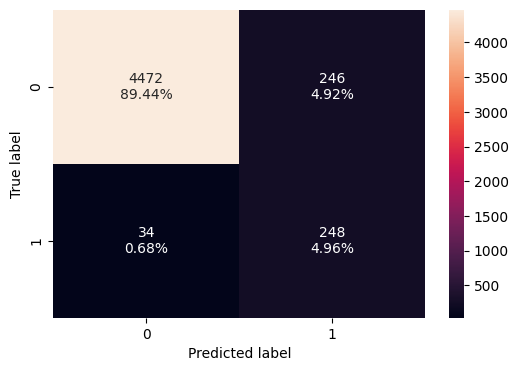

In [63]:
#Creating confusion matrix
confusion_matrix_sklearn(rf_undersample_tuned,X_test,y_test)

**Observations**

The Random Forest Tuned Undersample continues to perform well on the test dataset, with strong recall and acceptable precision given the project’s focus on recall. This consistency across training, validation, and test datasets shows that the model has generalized well on the test data, making it a reliable choice for deployment in ReneWind's predictive maintenance system.



Checking the important features for prediction as per the the final model

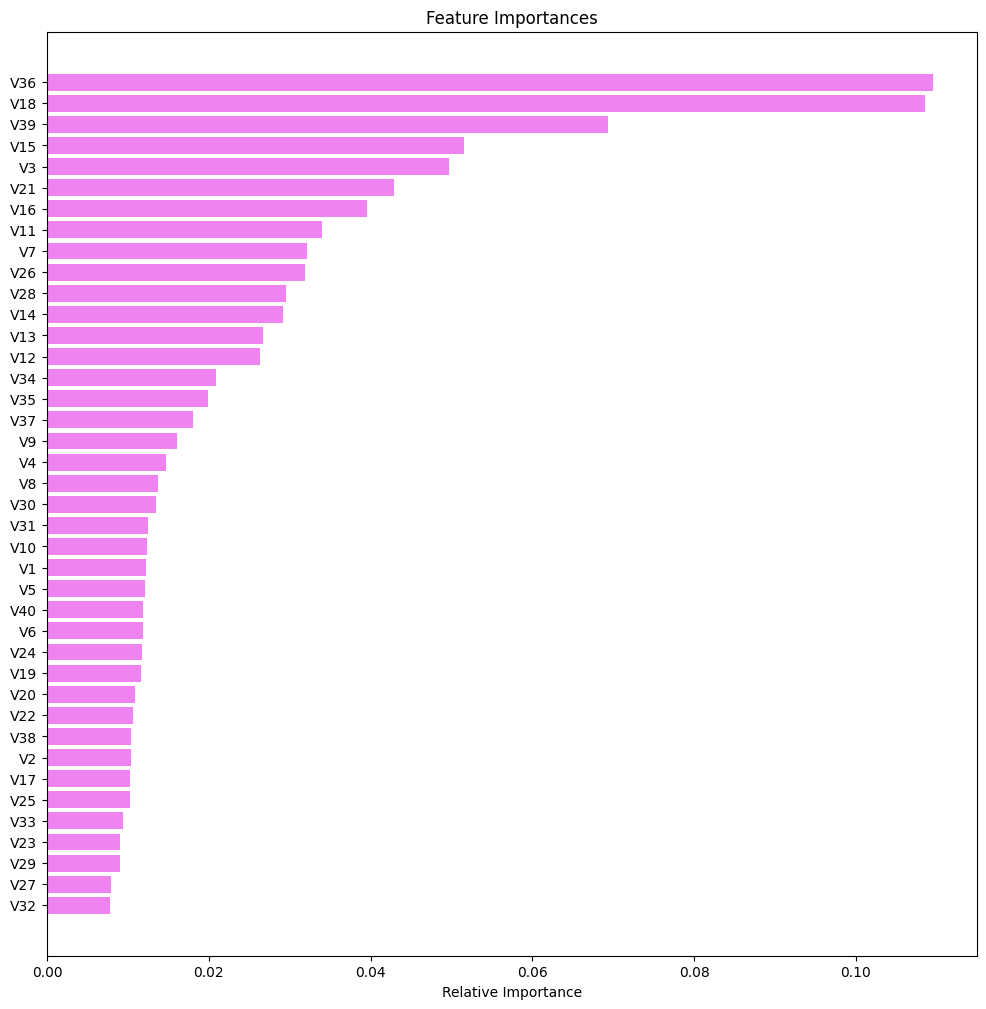

In [68]:
feature_names = X.columns
importances = rf_undersample_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**

The plot highlights the most important features contributing to the model's predictions. The top six features identified are:

1. V36: The most influential feature, playing a significant role in predicting generator failures. Its strong negative correlation with the target variable (-0.22) is reflected in its prominence in the model.
2. V18: The second most important feature, with the strongest negative correlation (-0.27), reinforcing its critical role in failure detection.
3. V39: The third-ranked feature, which also exhibits a moderately strong negative correlation (-0.24), highlighting its importance in predicting failures.
4. V15: The fourth most impactful feature, positively correlated with the target variable (0.26), indicating its strong contribution to identifying failure cases.
5. V3: Ranked fifth, this feature has a negative correlation (-0.22), consistent with its importance in distinguishing critical failure conditions.
6. V21: The sixth feature, positively correlated with the target variable (0.26), reinforcing its role in predicting failures.


The feature importance plot and correlation observations align closely, confirming that the model's reliance on these features is consistent with their statistical relationship to the target variable. Most features with significant correlation values, such as V18 (-0.27), V15 (0.26), V21 (0.26), V39 (-0.24), and V36 (-0.22), also appear among the top-ranked features in the importance plot. This alignment indicates a reinforced linkage between the two analyses, demonstrating that the model effectively leverages features with strong correlations to the target variable. This consistency adds confidence to the model's interpretability and its ability to detect generator failures effectively.

## Pipelines to build the final model


In [13]:
# creating a list of numerical variables with missing values
missing_value_features = ["V1", "V2"]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables with missing values
missing_value_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

# Use ColumnTransformer to specify which features to apply the numeric transformer to
preprocessor = ColumnTransformer(
    transformers=[
        ("num", missing_value_transformer, missing_value_features),
    ],
    remainder="passthrough"
)

In [14]:
# Creating new pipeline with best parameters
Final_pipeline_model = Pipeline(
    steps=[
        ("pre", preprocessor),
        ("RF",
          RandomForestClassifier(
            max_samples=0.6,
            min_samples_leaf=3,
            n_estimators=250,
            random_state=1
            ),
        ),
    ]
)

In [18]:
# Making a copy of the Train Dataframe containing the raw train data
ReneWind_train_df = ReneWind_train_main_df.copy()

# Separating target variable and other variables
X1_train = ReneWind_train_df.drop(["Target"], axis=1)
y1_train = ReneWind_train_df["Target"]

# Checking the number of rows and columns in the training sets
print(X1_train.shape)


(20000, 40)


In [26]:
# Making a copy of the Test Dataframe containing the raw test data
ReneWind_test_df = ReneWind_test_main_df.copy()

# Separating target variable and other variables
X1_test = ReneWind_test_df.drop(["Target"], axis=1)
y1_test = ReneWind_test_df["Target"]

# Checking the number of rows and columns in the testing sets
print(X1_test.shape)


(5000, 40)


In [86]:
# We need to treat missing value in the training set before carrying out undersampling
imputer = SimpleImputer(strategy="median")
cols_to_impute = ["V1", "V2"]

# Fit and transform the train data
X1_train[cols_to_impute] = imputer.fit_transform(X1_train[cols_to_impute])

# Checking that no column has missing values in train or test sets
print(X1_train.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64


In [20]:
print("Before UnderSampling, counts of label '1': {}".format(sum(y1_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y1_train == 0)))


#  Performing Undersampling as best model (Tuned Random Forest) was established through Undersampling
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X1_train_un, y1_train_un = rus.fit_resample(X1_train, y1_train)

print("After UnderSampling, counts of label '1': {}".format(sum(y1_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y1_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X1_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y1_train_un.shape))

Before UnderSampling, counts of label '1': 1110
Before UnderSampling, counts of label '0': 18890 

After UnderSampling, counts of label '1': 1110
After UnderSampling, counts of label '0': 1110 

After UnderSampling, the shape of train_X: (2220, 40)
After UnderSampling, the shape of train_y: (2220,) 



In [21]:
# pipeline object can be used as a normal classifier
Final_pipeline_model.fit(X1_train_un, y1_train_un)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['V1', 'V2'])])),
                ('RF',
                 RandomForestClassifier(max_samples=0.6, min_samples_leaf=3,
                                        n_estimators=250, random_state=1))])

In [30]:
# Let's check the performance on test set
Model_test = model_performance_classification_sklearn(Final_pipeline_model, X1_test, y1_test)
Model_test

,Accuracy,Recall,Precision,F1
0,0.946,0.872,0.515,0.647


**Observations**

The pipeline was implemented to streamline preprocessing and modeling for consistent and reproducible results. The treatment of missing values in the training set was handled outside the pipeline, as undersampling was required to balance the dataset. After undersampling, the pipeline was fit on the undersampled training data, ensuring that the model training aligned with the balanced dataset.

For evaluation:

* The test dataset was processed using the pipeline, which automatically handled missing values and ensured consistent transformations before predictions were made.

Performance Comparison:

* Recall with Manual Approach: The model achieved a recall of 0.879 on the test dataset without using the pipeline.
* Recall with Pipeline: Using the pipeline, the model achieved a slightly lower recall of 0.872 on the test dataset.

This 0.007 difference in recall is minor and acceptable, likely resulting from slight variations in data processing and model training. Importantly, the pipeline ensures consistent preprocessing of unseen test data, making it a robust and scalable choice for deployment.


# Business Insights and Conclusions

**********************
**Business Insights**
**********************


1. Feature Importance:
  * The model identified V36, V18, V39, V15, V3, and V21 as the top six features influencing predictions. While the data remains ciphered for confidentiality, these features are highly predictive and critical for identifying generator failure patterns.

2. Model Performance:
  * The Random Forest Classifier achieved a recall of 0.872 on the test dataset using the pipeline. This is slightly lower than the recall of 0.879 achieved through the manual approach, with a difference of 0.007.
  * Despite the marginal variation, the pipeline provides consistency in preprocessing and scalability for operational use, outweighing the slight difference in recall.

3. Operational Value:
  * The model’s ability to prioritize at-risk generators through predictive insights offers significant operational benefits, including reduced downtime and optimized maintenance schedules.

***********************************
**Conclusions and Recommendations**
***********************************

1. Proactive Maintenance:
  * Focus monitoring efforts on generators flagged by the top features to proactively manage risks and schedule interventions, minimizing unplanned failures.

2. Pipeline Deployment:
  * Deploy the pipeline for real-world use, leveraging its automation and consistency for preprocessing and predictions, even with new and unseen datasets.

3. Model Refinement:
  * Retrain the model periodically with updated data to sustain its accuracy and adapt to changing operational contexts. If possible, integrate domain-specific features to enhance interpretability and precision.

4. Performance Validation:
  * Continuously validate the model’s predictions in a production environment. Use recall as a key metric to ensure the majority of failure cases are identified, maintaining alignment with business priorities.





***